# 가설 1번. 
- 고등학교 사교육비 지출이 증가하였고, 초중고 사교육비의 총 지출에는 큰 차이가 없을 것이다.

### 가설 1-1 

```
# ------------------------------------------------------------------------------------------ #
  가설 1-1 지역별 사교육비 지출은 서울이 가장 높을 것이다. 
    
    DataFrame 

    기준 1
    df_ratio : 각 과목 별 전국 평균 참여율과 서울시 사교육 참여율
     - df_participation_ratio : 전국 - 서울의 사교육 참여율을 비교
     - df_seoul_subject_ratio : 서울 시 과목별 사교육 참여율 비교

    기준 2
    df_region_subject_student_mean: 각 과목 별 전국 평균 참여율과 서울시 사교육 참여율
     - df_region_private : private education expenses
     - df_region_subject : region-subject private education expenses
     
    기준 3 
    df_region_p_edu_type : 각 지역별 사교육 지출 유형 
    
    기준 4
    df_region_school_year_sum : 지역 - 학교급에 따른 연간 사교육비 총액   
     - df_region_sum : 지역별 사교육비 총액 비교 
     - df_subject_sum : 각 지역 과목별 사교육비 총액 비교   
      
# ------------------------------------------------------------------------------------------ #
```
  
  

#### 인사이트 
- 서울시 사교육 참여율은 70~80% 로 아주 높은 비율을 차지하고 있다. 
    - 중점적으로 투자하는 과목은 수학과 영어, 예체능계열 
- 학생 1인당 월 평균 사교육비도 서울시가 압도적으로 높은 지출을 차지하고 있다. 
    - 과목별 월 평균 사교육비 지출도 다른 지역보다 높은 지출을 차지하고 있다.  
- 전체적으로 코로나사태때 잠시 주춤했다가 대면 수업 시행 이후 급격한 증가세를 나타내고 있다.
    - 영어와 수학에 주로 투자하는 것을 알 수 있었다. 
        - 공교육의 어떤 부분이 마음에 안들어서 사교육을 병했했는지? 
        - 학교 수업만으로는 좋은 성적을 받기가 힘들었을지 ? 
        
        
---
  
### 가설 1-2

```
# ------------------------------------------------------------------------------------------ #
  가설 1-2 서울시 고등학교 사교육비 지출이 가장 높을 것이다.
    
    DataFrame

    df_region_class_mean : 학교급별 전체 사교육비 지출 월 평균 금액
        
# ------------------------------------------------------------------------------------------ #

```
  
    
      
#### 인사이트
- 고등학교 : 고등학교(일반고&특성화고)와 일반고(특성화고 제외)
- 서울시의 초·중·고등학생 대상 사교육은 크게 영어와 수학 중심으로 이루어졌음을 알 수 있다.
    - 초등학교의 영어과목 사교육비 지출이 크게 늘었고 가장 비중이 높다.
        - 어릴 때부터 학습 환경에 따른 학력격차가 여실히 드러나는 과목
        - 투자한 금액과 성적이 비례할 가능성이 높은 과목으로 학부모들 사이에서 관심 비중이 큰 과목이라고 한다.

---
  
  
  
### 가설 1-3
```
# ------------------------------------------------------------------------------------------ #
  가설 1-3 : 서울시 각 학교급별 사교육 참여율이 가장 높을 것이다. 
    
    DataFrame
    
    기준 1 
    df_region_class : 지역 - 학교급에 따른 연간 사교육 참여율
        - df_seoul_class_ratio : 서울시 교급별 사교육 참여율
    

# ------------------------------------------------------------------------------------------ #
```
  
    

#### 인사이트 
- 초등학교는 거의 80~90%가 사교육을 병행하는 것으로 판단됨
    - 2020년 초반에는 비대면교육으로 잠시 주춤했다가 다시 증가세를 보이고 있다.
- 서울의 평균 참여율은 전국 평균 참여율에 비해 높은편이다.
- 사교육이 꾸준히 증가하고 있다는 점이 눈에 띈다.

## 가설 1-1 : 지역별 사교육비 지출은 서울이 가장 높을 것이다. 
    
    → 이부분은 왜 서울시를 기준으로 분석했는지를 이유로 들면 좋을 듯 
    - 지역별로 사교육에 들어가는 비용이 차이가 날 것이다. (서울 가장 높을 것으로 예상)

사용한 데이터 셋 

In [3]:
import pandas as pd 
from glob import glob 

file_names = glob('dataset/*')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 
import koreanize_matplotlib 
import matplotlib.font_manager as fm
import plotly.express as px
import sys

%config InlineBackend.figure_format = 'retina'


# 가능한 font list 확인
f = [f.name for f in fm.fontManager.ttflist]

# 확인 이후
plt.rc('font', family='Malgun Gothic')

In [10]:
print(sys.version)

3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]


### 전국 사교육 참여율 변화량 비교 
- 전국 사교육 참여율 변화 
- 전국 학교급별 사교육 참여율 변화 


#### 데이터 수집 
- df_ratio : 각 과목 별 전국 평균 참여율과 서울시 사교육 참여율  
    - df_participation_ratio = 전국 - 서울의 사교육 참여율을 비교 
    - df_seoul_subject_ratio : 서울 시 과목별 사교육 참여율 비교 
    
 - 칼럼명 
     기준 / 과목 / 연도 / 참여율 

In [5]:
def mapping(x):
    if x == '-':
        x = 0.0
    return x

df_ratio = pd.read_csv('dataset/지역_및_과목별_사교육_참여율_20221019141852.csv',encoding = 'cp949')
df_ratio['과목 및 유형'] = df_ratio ['과목 및 유형'].map(lambda x : x.replace(' ',''))
df_ratio['항목'] = df_ratio['항목'].map(lambda x : x.replace(' ','').replace('(%)',''))
df_ratio = pd.melt(df_ratio, id_vars=['항목','과목 및 유형'], var_name = '시점', value_name = '참여율').set_axis(['기준','과목','연도','참여율'],axis='columns')
df_ratio['참여율'] = df_ratio['참여율'].apply(mapping).astype(float)
df_ratio['연도'] = pd.to_numeric(df_ratio['연도'])
df_ratio.head()

,기준,과목,연도,참여율
0,평균,사교육참여,2011,71.7
1,평균,국어,2011,26.2
2,평균,영어,2011,49.2
3,평균,수학,2011,50.2
4,평균,"사회,과학",2011,17.0


In [6]:
df_ratio[(df_ratio['기준'] == '서울')].head()

,기준,과목,연도,참여율
12,서울,사교육참여,2011,77.0
13,서울,국어,2011,28.9
14,서울,영어,2011,54.7
15,서울,수학,2011,54.3
16,서울,"사회,과학",2011,17.0


In [7]:
df_participation_ratio = df_ratio[df_ratio['과목'] == '사교육참여']
df_seoul_subject_ratio = df_ratio[(df_ratio['기준'] == '서울') & (df_ratio['과목'] != '사교육참여')]

#### 분석과제 1 . 전국- 서울의 사교육 참여율 비교하기 
- 서울의 사교육 참여비율이 어떻게 되는지 ? 

#### 분석과제 2. 서울시 각 과목별 사교육 참여율 비교하기 
- 가장 높은 비율을 차지하는 과목 (사교육이 가장 필요한 과목) 파악하기 
- 영어와 수학을 위주로 사교육 참여가 높아졌을것이다. 

In [8]:
df_participation_ratio.to_csv('dataset_eda/전국_서울_사교육참여율변화.csv')
df_seoul_subject_ratio.to_csv('dataset_eda/연간_서울시_과목별_사교육참여율변화.csv')

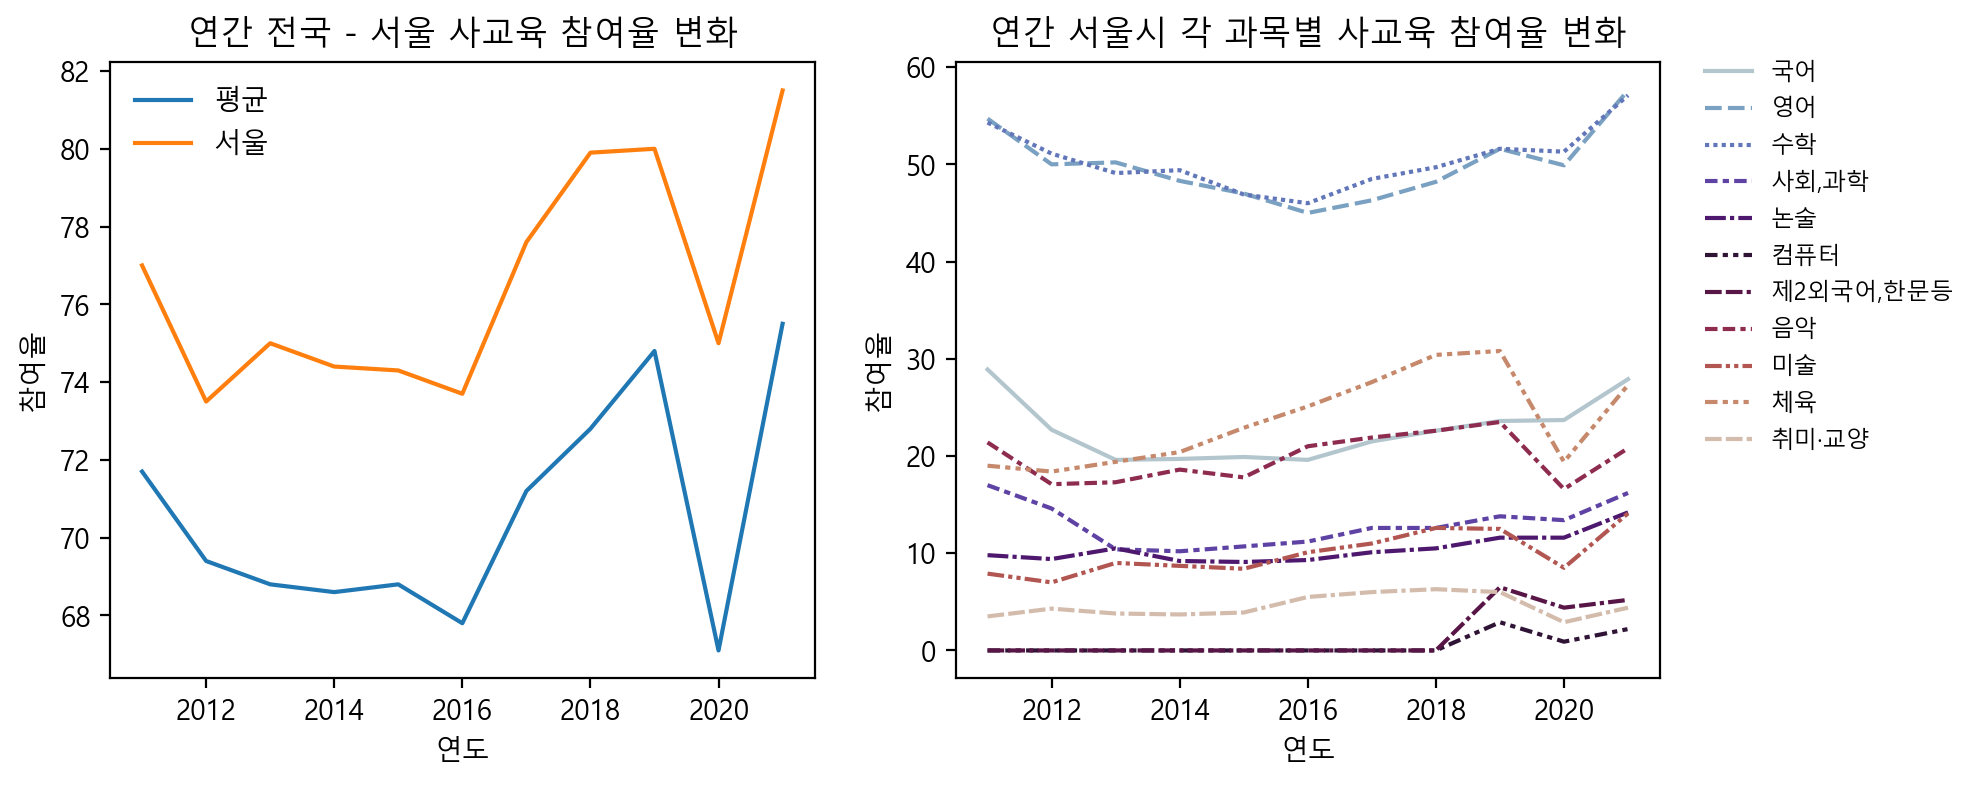

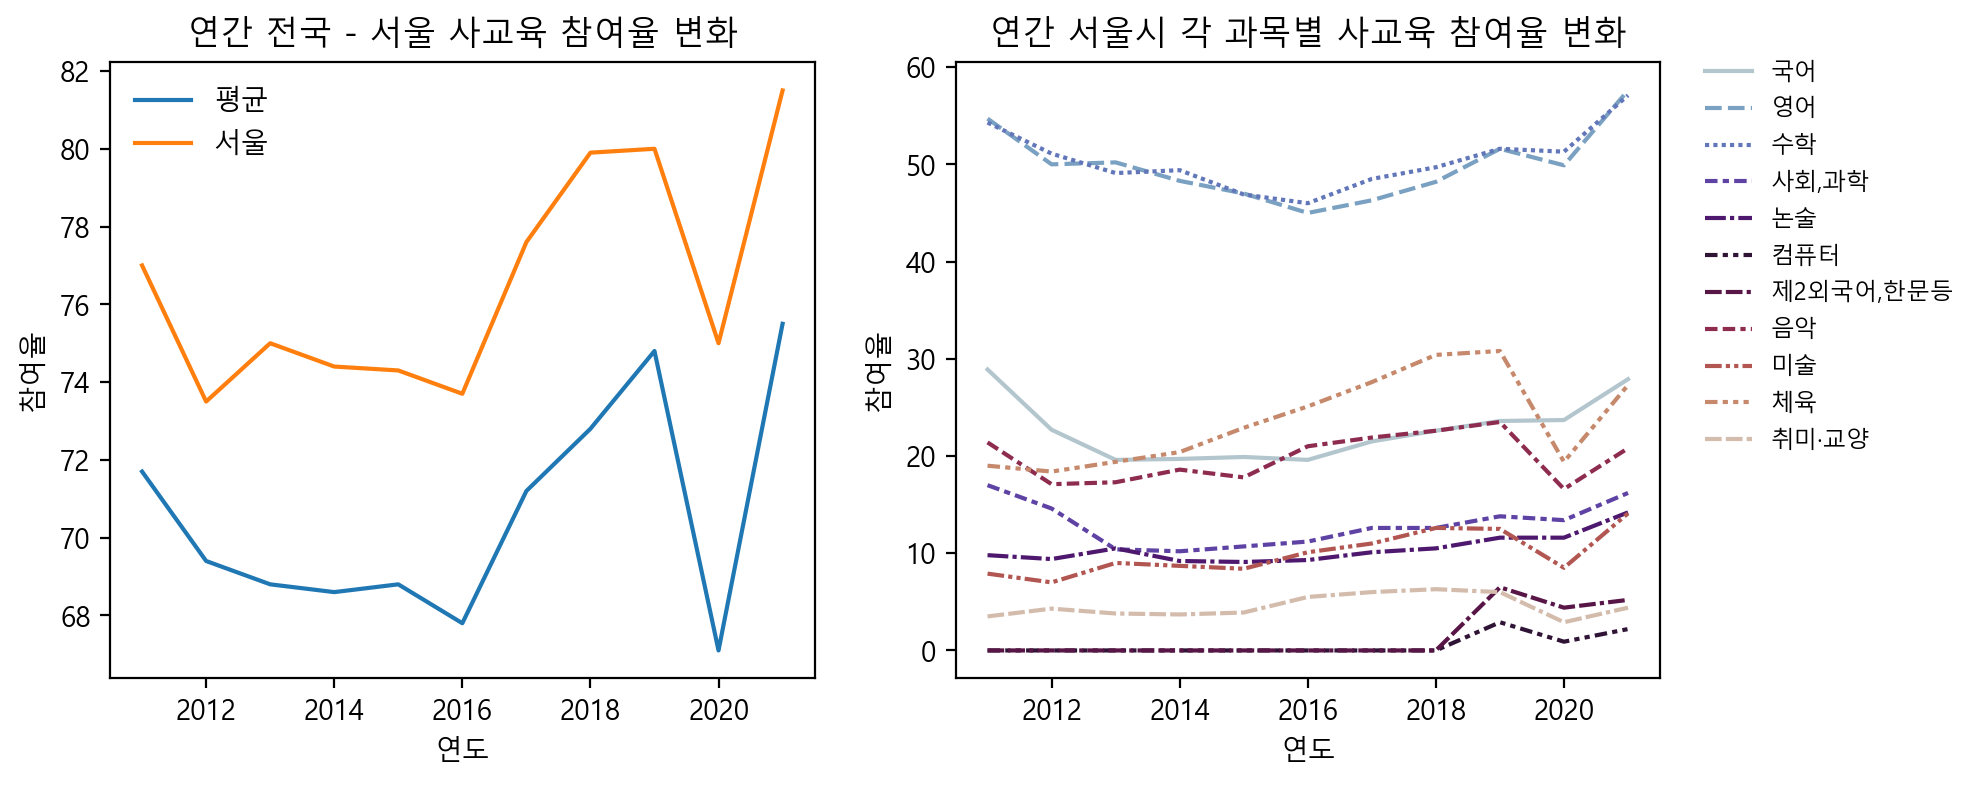

In [9]:
fig , ax = plt.subplots(ncols=2,figsize=(10,4))

sns.lineplot(x='연도',y='참여율',data=df_participation_ratio ,hue='기준',ax=ax[0]).set(title='연간 전국 - 서울 사교육 참여율 변화')
sns.lineplot(x='연도',y='참여율',data=df_seoul_subject_ratio ,hue='과목',style="과목",
            palette="twilight",ax=ax[1]).set(title='연간 서울시 각 과목별 사교육 참여율 변화')

ax[0].legend(fontsize = 10,edgecolor='white')
ax[1].legend(loc=(1.05,0.35), fontsize = 8.5,facecolor='white',edgecolor='white')
fig

### 지역_ 과목별 학생 1인당 월평균 사교육비 지출변화 테이블

#### 데이터 수집 
- df_region_subject_student_mean: 각 과목 별 전국 평균 참여율과 서울시 사교육 참여율  
    - df_region_private : private education expenses
    - df_region_subject : region-subject private education expenses  
       
- 칼럼명   
  기준 / 과목 / 연도 / 월 평균 사교육비

**1. 데이터 수집 및 전처리**

In [10]:
df_region_subject_student_mean= pd.read_csv('dataset/지역별_학생_1인당_월평균_사교육비_20221019130726.csv',encoding = 'cp949')
df_region_subject_student_mean['과목 및 유형'] = df_region_subject_student_mean['과목 및 유형'].map(lambda x : x.replace(' ',''))
df_region_subject_student_mean['과목 및 유형'].unique()

array(['사교육비', '국어', '영어', '수학', '사회,과학', '논술', '컴퓨터', '제2외국어,한문등', '음악',
       '미술', '체육', '취미·교양'], dtype=object)

In [11]:
df_region_subject_student_mean.head()

,항목,과목 및 유형,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,서 울 (만원),사교육비,32.8,31.2,32.8,33.5,33.8,35.2,39.1,41.1,45.1,45.3,52.9
1,서 울 (만원),국어,2.7,2.4,2.3,2.3,2.3,2.5,3.0,3.2,3.5,4.1,4.8
2,서 울 (만원),영어,10.8,10.1,11.3,11.2,11.2,10.7,11.1,12.0,13.0,13.7,15.7
3,서 울 (만원),수학,9.6,10.4,10.4,10.8,10.6,10.8,11.7,11.9,12.6,14.1,15.5
4,서 울 (만원),"사회,과학",1.7,1.7,1.1,1.2,1.3,1.6,1.8,1.8,2.1,2.5,2.7


In [12]:
df_region_subject_student_mean = pd.melt(df_region_subject_student_mean,id_vars=['항목','과목 및 유형'],value_vars=df_region_subject_student_mean.columns,var_name='연도',value_name='월평균')

In [13]:
df_region_subject_student_mean['지역'] = df_region_subject_student_mean['항목'].str.replace(' \(\만\원\)','',regex=True).map(lambda x : x.replace(' ',''))
df_region_subject_student_mean= df_region_subject_student_mean.drop(columns='항목',axis='columns')
df_region_subject_student_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   과목 및 유형  528 non-null    object
 1   연도       528 non-null    object
 2   월평균      528 non-null    object
 3   지역       528 non-null    object
dtypes: object(4)
memory usage: 16.6+ KB


In [14]:
df_region_subject_student_mean['월평균'] = df_region_subject_student_mean['월평균'].apply(mapping).astype(float)
df_region_subject_student_mean['연도'] = pd.to_numeric(df_region_subject_student_mean['연도'])

In [15]:
df_region_private  = df_region_subject_student_mean[df_region_subject_student_mean['과목 및 유형'] == '사교육비']
df_region_subject =df_region_subject_student_mean[df_region_subject_student_mean['과목 및 유형'] != '사교육비']

In [16]:
df_region_private.to_csv('dataset_eda/연간_지역별_1인당_월평균_사교육비.csv')
df_region_subject.to_csv('dataset_eda/연간_지역_과목별_1인당_월평균_사교육비.csv')

#### 분석과제 1. 지역별 학생 월평균 지출 사교육비 
- 각 지역별로 1명의 학생이 월마다 지출하는 평균 사교육비의 변화를 살펴본다. 
- 서울시, 수도권 학생의 월 평균 사교육비가 가장 높은지를 확인한다. 

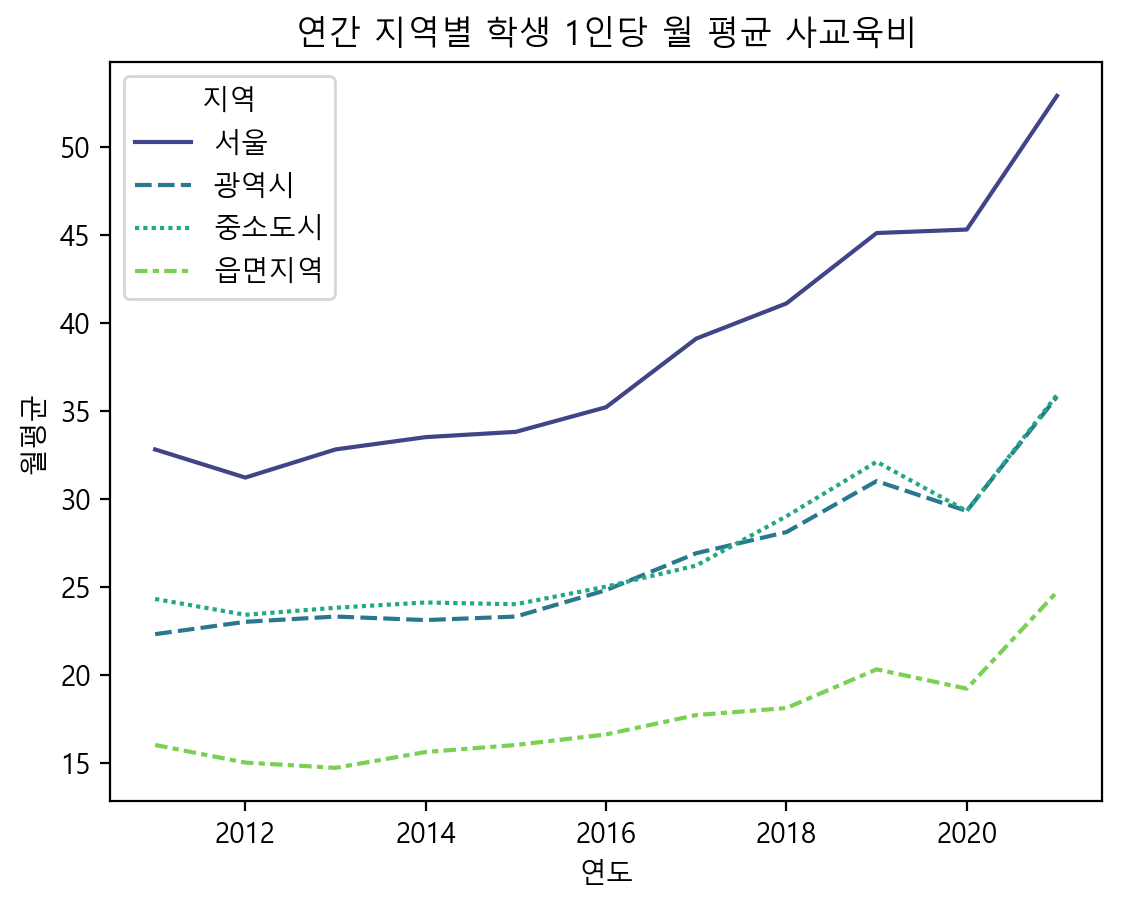

In [17]:
sns.lineplot(x='연도',y='월평균',data= df_region_private ,hue='지역',style='지역',palette="viridis").set(title='연간 지역별 학생 1인당 월 평균 사교육비')
plt.show()

#### 분석과제 2. 각 지역 과목별 지출 월평균 사교육비
- 각 지역별로 어떤 과목을 중점으로 사교육비가 지출되는지를 알아본다. 
- 서울시, 수도권 지역의 사교육비 지출이 높은지 확인한다.

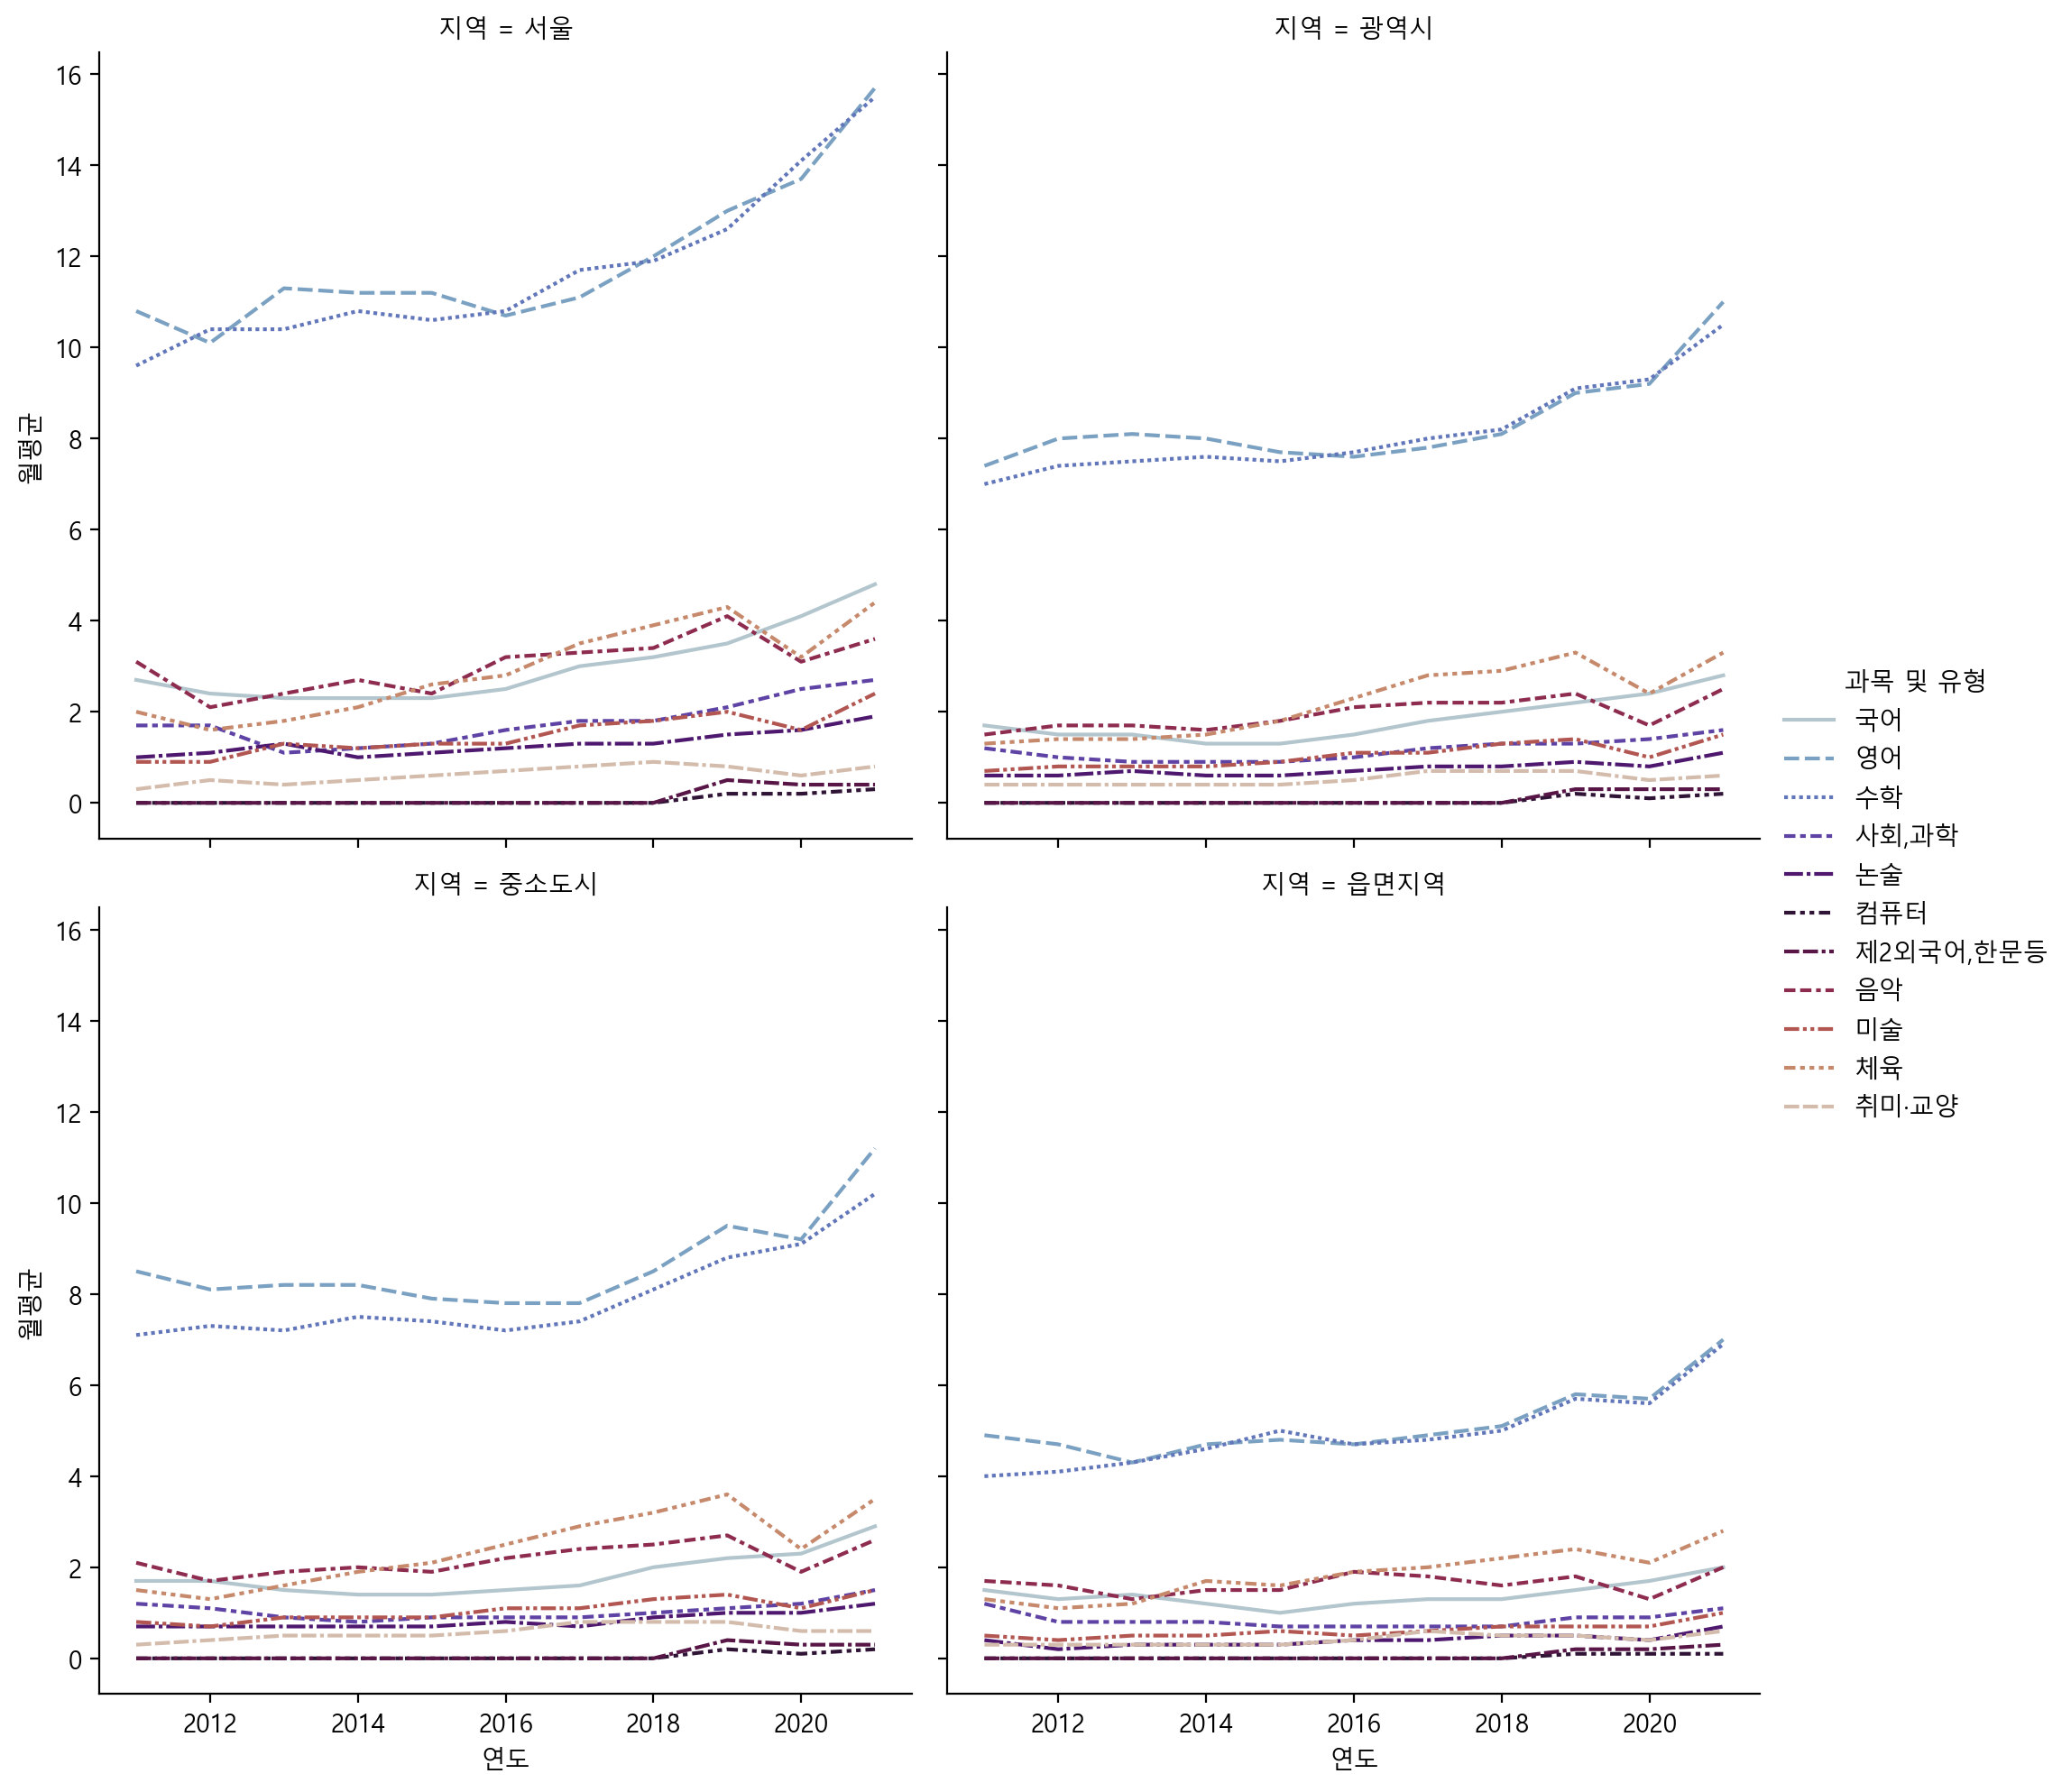

In [18]:
sns.relplot(data = df_region_subject ,x='연도',y='월평균',hue='과목 및 유형',style = '과목 및 유형',col='지역',col_wrap=2,kind='line', palette="twilight")
plt.show()

#### 분석과제 3. 각 지역별 사교육 지출 유형 비교 
- 일반 교과목에 대해 (국영수사과,논술,제2외국어,컴퓨터 ... ) 1인당 지출되는 월 평균 사교육비 데이터
    - df_region_p_edu_type 

x

In [19]:
df_region_p_edu_type= pd.read_csv('dataset/지역별_학생_사교육_유형.csv',encoding = 'cp949')
df_region_p_edu_type = pd.melt(df_region_p_edu_type , id_vars = ['항목','과목 및 유형'], var_name='연도',value_name='월평균')
df_region_p_edu_type['항목'] = df_region_p_edu_type['항목'].str.replace(' \(\만\원\)','',regex=True)
df_region_p_edu_type['연도'] = pd.to_numeric(df_region_p_edu_type['연도'])
df_region_p_edu_type['월평균'] = pd.to_numeric(df_region_p_edu_type['월평균']) 
df_region_p_edu_type = df_region_p_edu_type.set_axis(['지역','유형','연도','월평균'],axis='columns')

In [20]:
df_region_p_edu_type.to_csv('dataset_eda/지역별_학생_사교육_지출유형.csv')

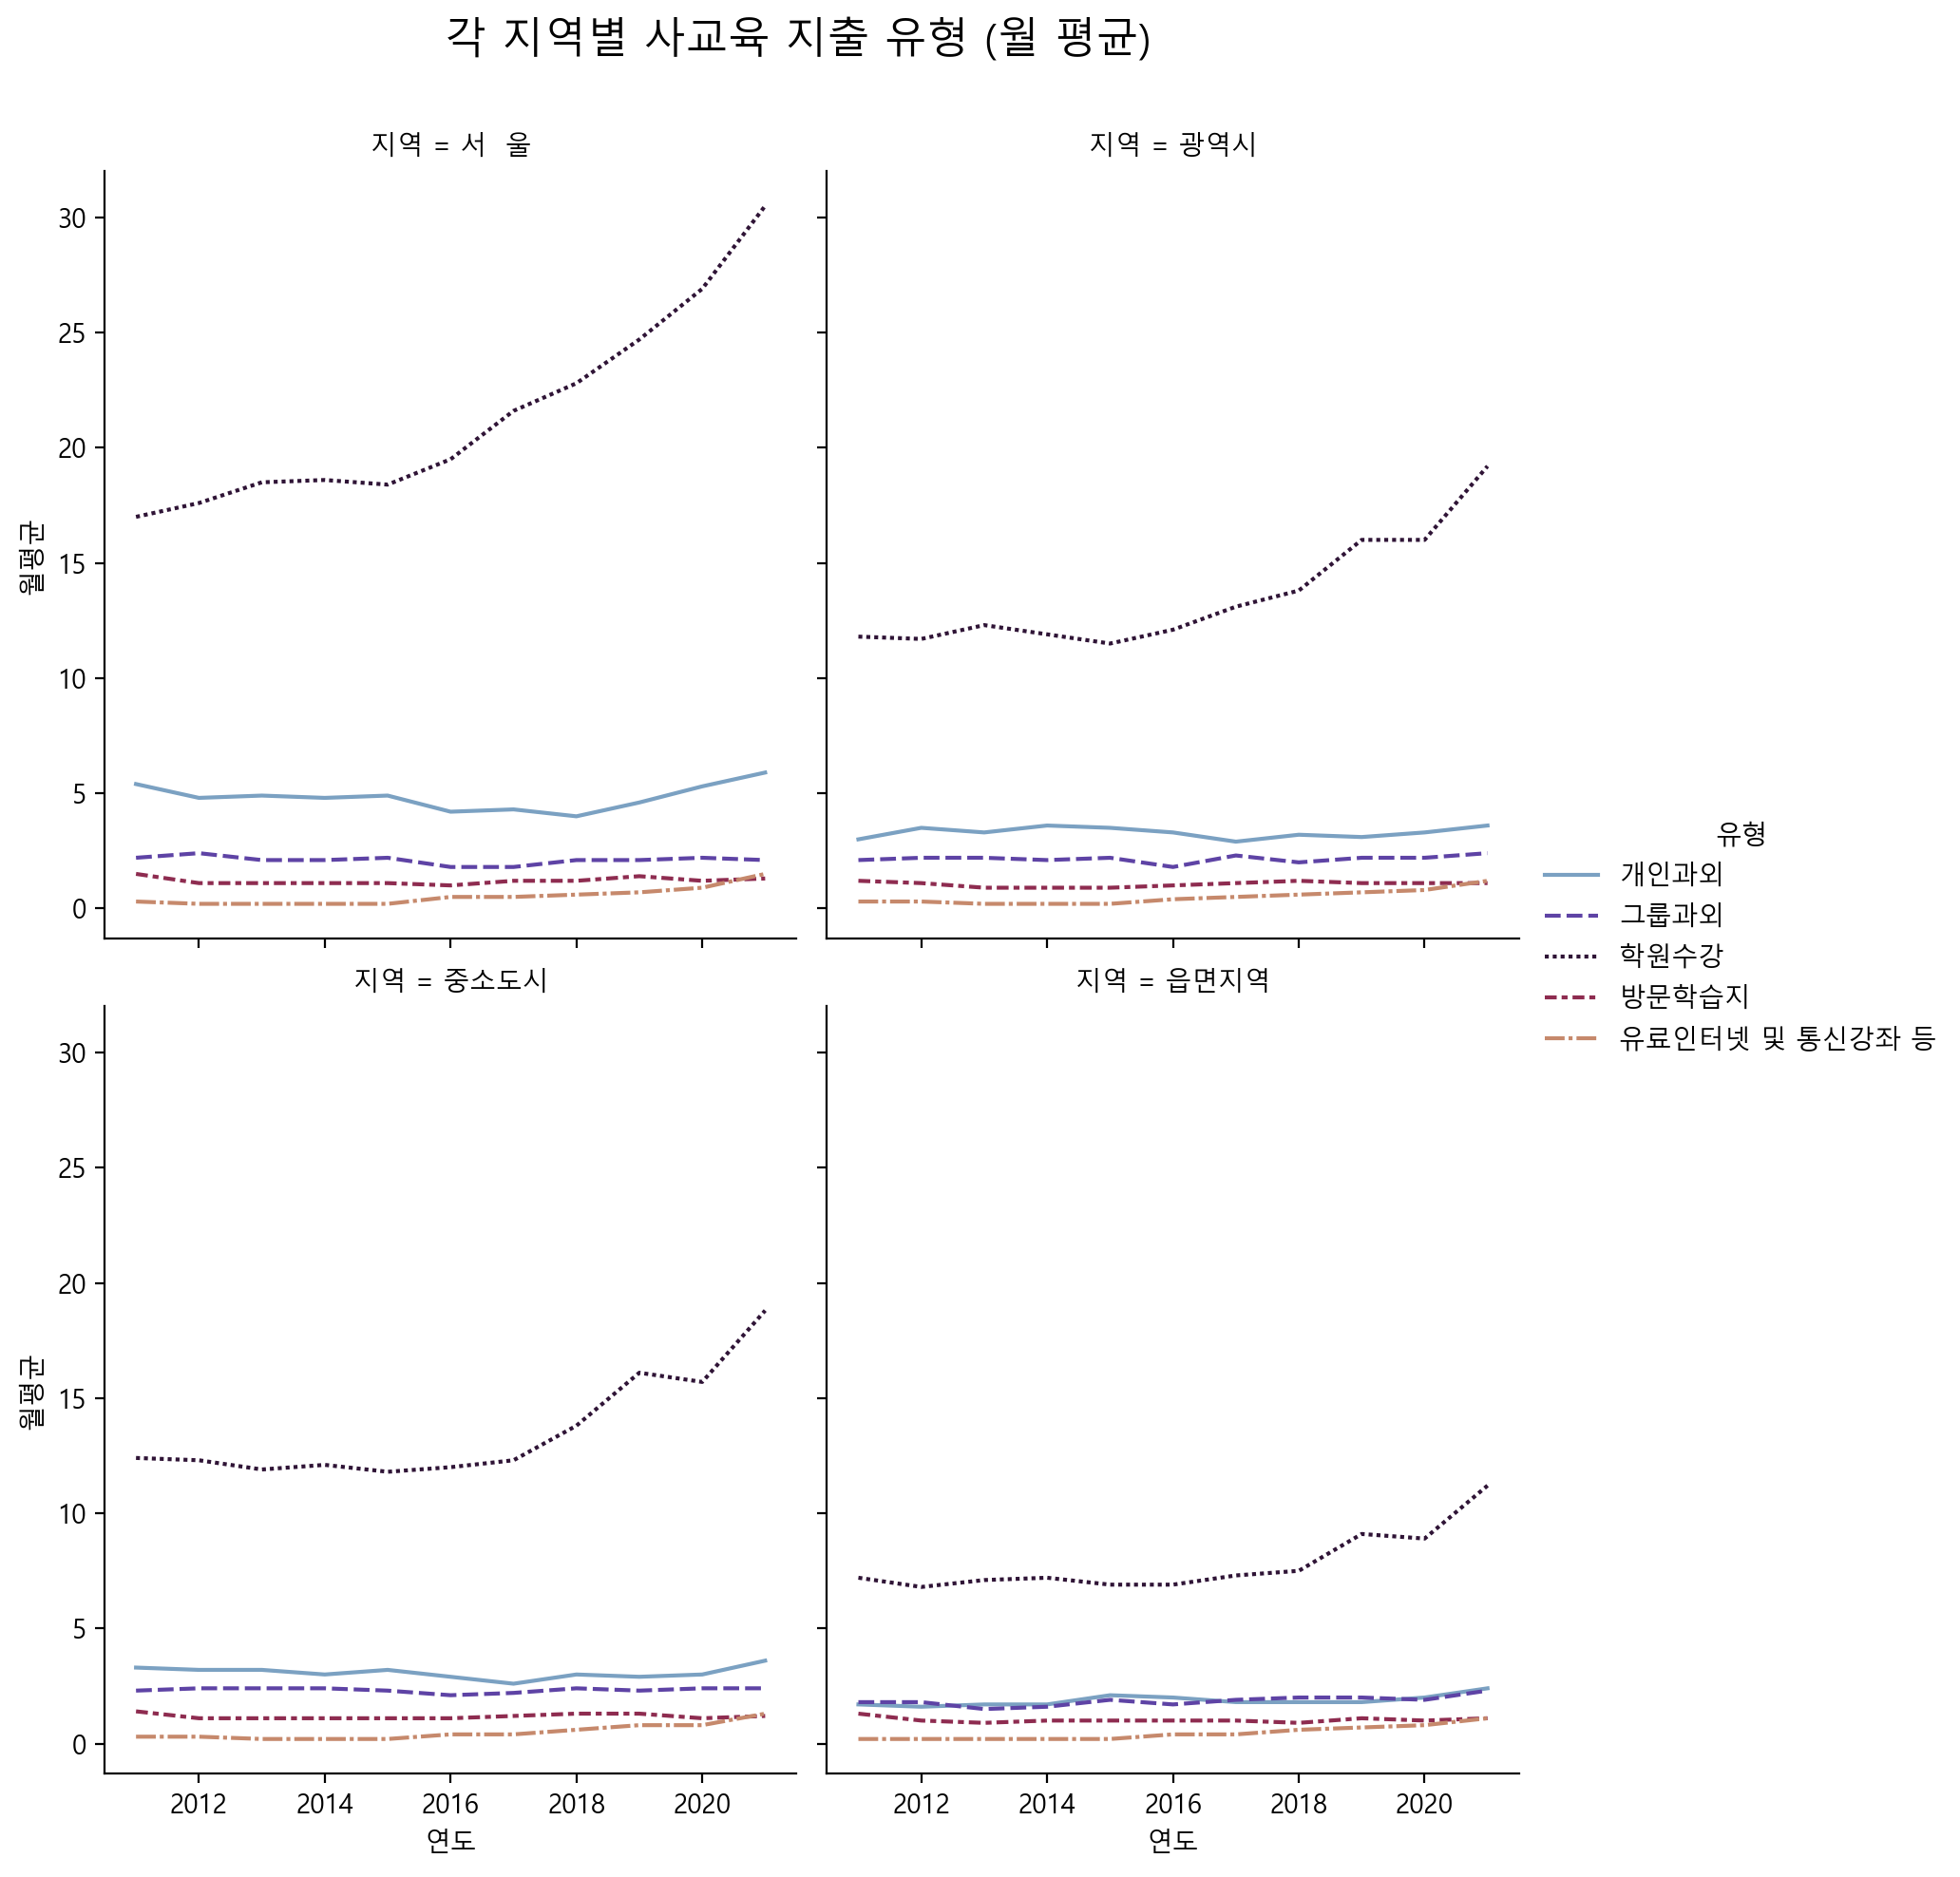

In [21]:
reg = sns.relplot(data = df_region_p_edu_type ,x='연도',y='월평균',hue='유형',style = '유형',col='지역',col_wrap=2,kind='line', palette="twilight")
reg.fig.subplots_adjust(top=0.9,left=0.2)
reg.fig.suptitle('각 지역별 사교육 지출 유형 (월 평균)', fontsize = 16)
plt.show()

### 지역별 각 학교급 연간 사교육비 총액 

#### 데이터 수집 
- df_region_school_year_sum : 지역 - 학교급에 따른 연간 사교육비 총액   
    - df_region_sum : 지역별 사교육비 총액 비교 
    - df_subject_sum : 각 지역 과목별 사교육비 총액 비교   
      
- 칼럼명   
     기준 / 특성 (지역 또는 과목) / 연도 / 사교육비 총액

In [22]:
df_region_school_year_sum = pd.read_csv('dataset/학교급별_사교육비_총액_20221019112918.csv',encoding = 'cp949')
df_region_school_year_sum.head(2)

,항목,특성별,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,초등학교 (억원),서울,19544,15745,16006,16481,16017,15625,17532,18595,19529,17232,22693
1,초등학교 (억원),광역시,19294,19608,18483,17682,17616,18259,19631,19339,21651,17329,23953


In [23]:
df_region_school_year_sum  = pd.melt(df_region_school_year_sum , id_vars = ['항목','특성별'], var_name='연도',value_name='총액')
df_region_school_year_sum['항목'] = df_region_school_year_sum['항목'].str.replace(' \(\억\원\)','',regex=True)
df_region_school_year_sum['총액'] = pd.to_numeric(df_region_school_year_sum['총액'].apply(mapping))
df_region_school_year_sum['연도'] = pd.to_numeric(df_region_school_year_sum['연도'])

In [24]:
# 특성은 지역과 과목이 함께 들어가있음. 
city = ['서울','광역시','중소도시','읍면지역']
df_region_sum = df_region_school_year_sum[df_region_school_year_sum['특성별'].isin(city)]
df_subject_sum = df_region_school_year_sum[~df_region_school_year_sum['특성별'].isin(city)]

df_region_sum['특성별'].unique() , df_subject_sum['특성별'].unique()

(array(['서울', '광역시', '중소도시', '읍면지역'], dtype=object),
 array(['국어', '영어', '수학', '사회, 과학', '논술', '컴퓨터', '제2외국어, 한문 등', '음악', '미술',
        '체육', '취미·교양'], dtype=object))

#### 분석과제 1. 각 지역의 사교육비 지출 총액 비교 
- 어느 지역에서 사교육비 총액이 높은지를 비교하자. 
- 서울시가 가장 높은가 ? 

In [25]:
df_region_sum.to_csv('dataset_eda/지역별_연간_사교육비_총액_변화.csv')
df_subject_sum.to_csv('dataset_eda/지역_과목별_연간_사교육비_총액_변화.csv')

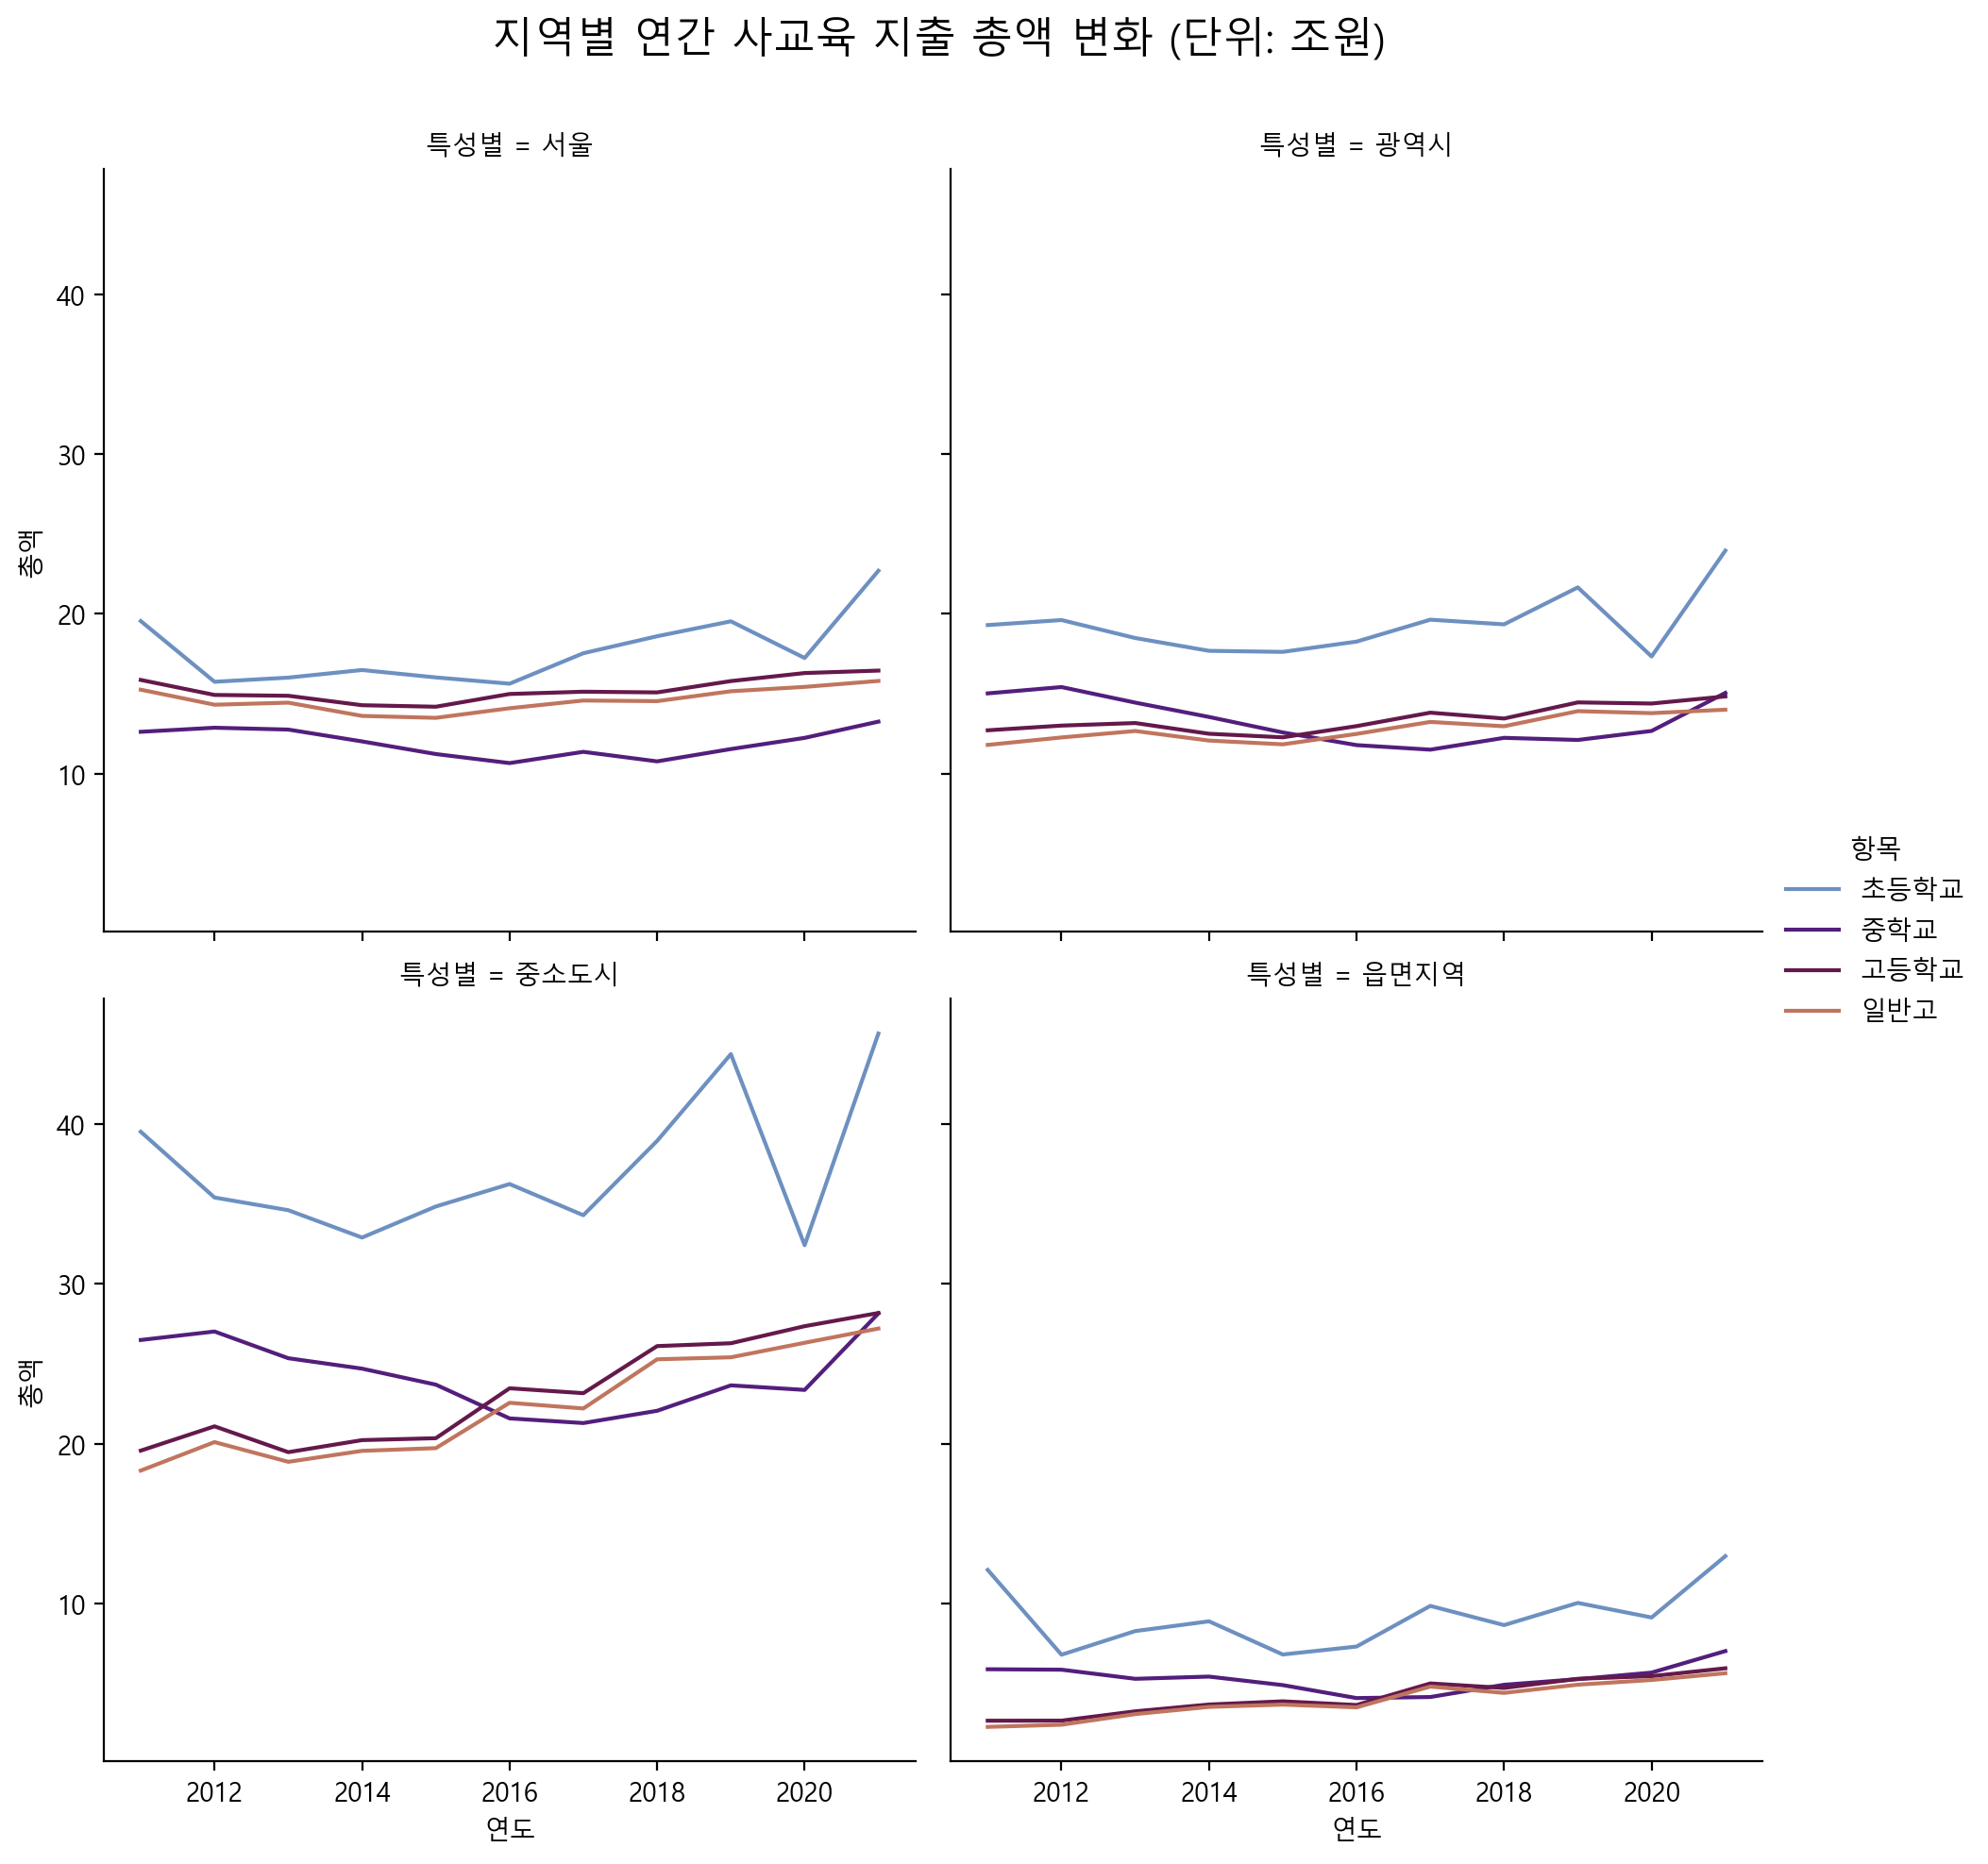

In [26]:
reg = sns.relplot(data =df_region_sum ,x='연도',y=df_region_sum['총액']/1000 ,hue='항목',col='특성별',col_wrap=2
                   ,kind='line', palette="twilight")

reg.fig.subplots_adjust(top=0.9,left=0.1)
reg.fig.suptitle('지역별 연간 사교육 지출 총액 변화 (단위: 조원)', fontsize = 16)
plt.show()

- 광역시와 중소도시의 경우 범위에 포함된 도시들의 수가 많기 때문에 총계가 높게 산출된 것으로 예상할 수 있다.

#### 분석과제 2. 각 지역의 과목별 사교육비 지출 총액 비교 
- 서울시를 기준으로 학교 교급에 따라 사교육비 지출 총액이 달라지는지 비교 
- 서울시가 가장 높은지 비교 

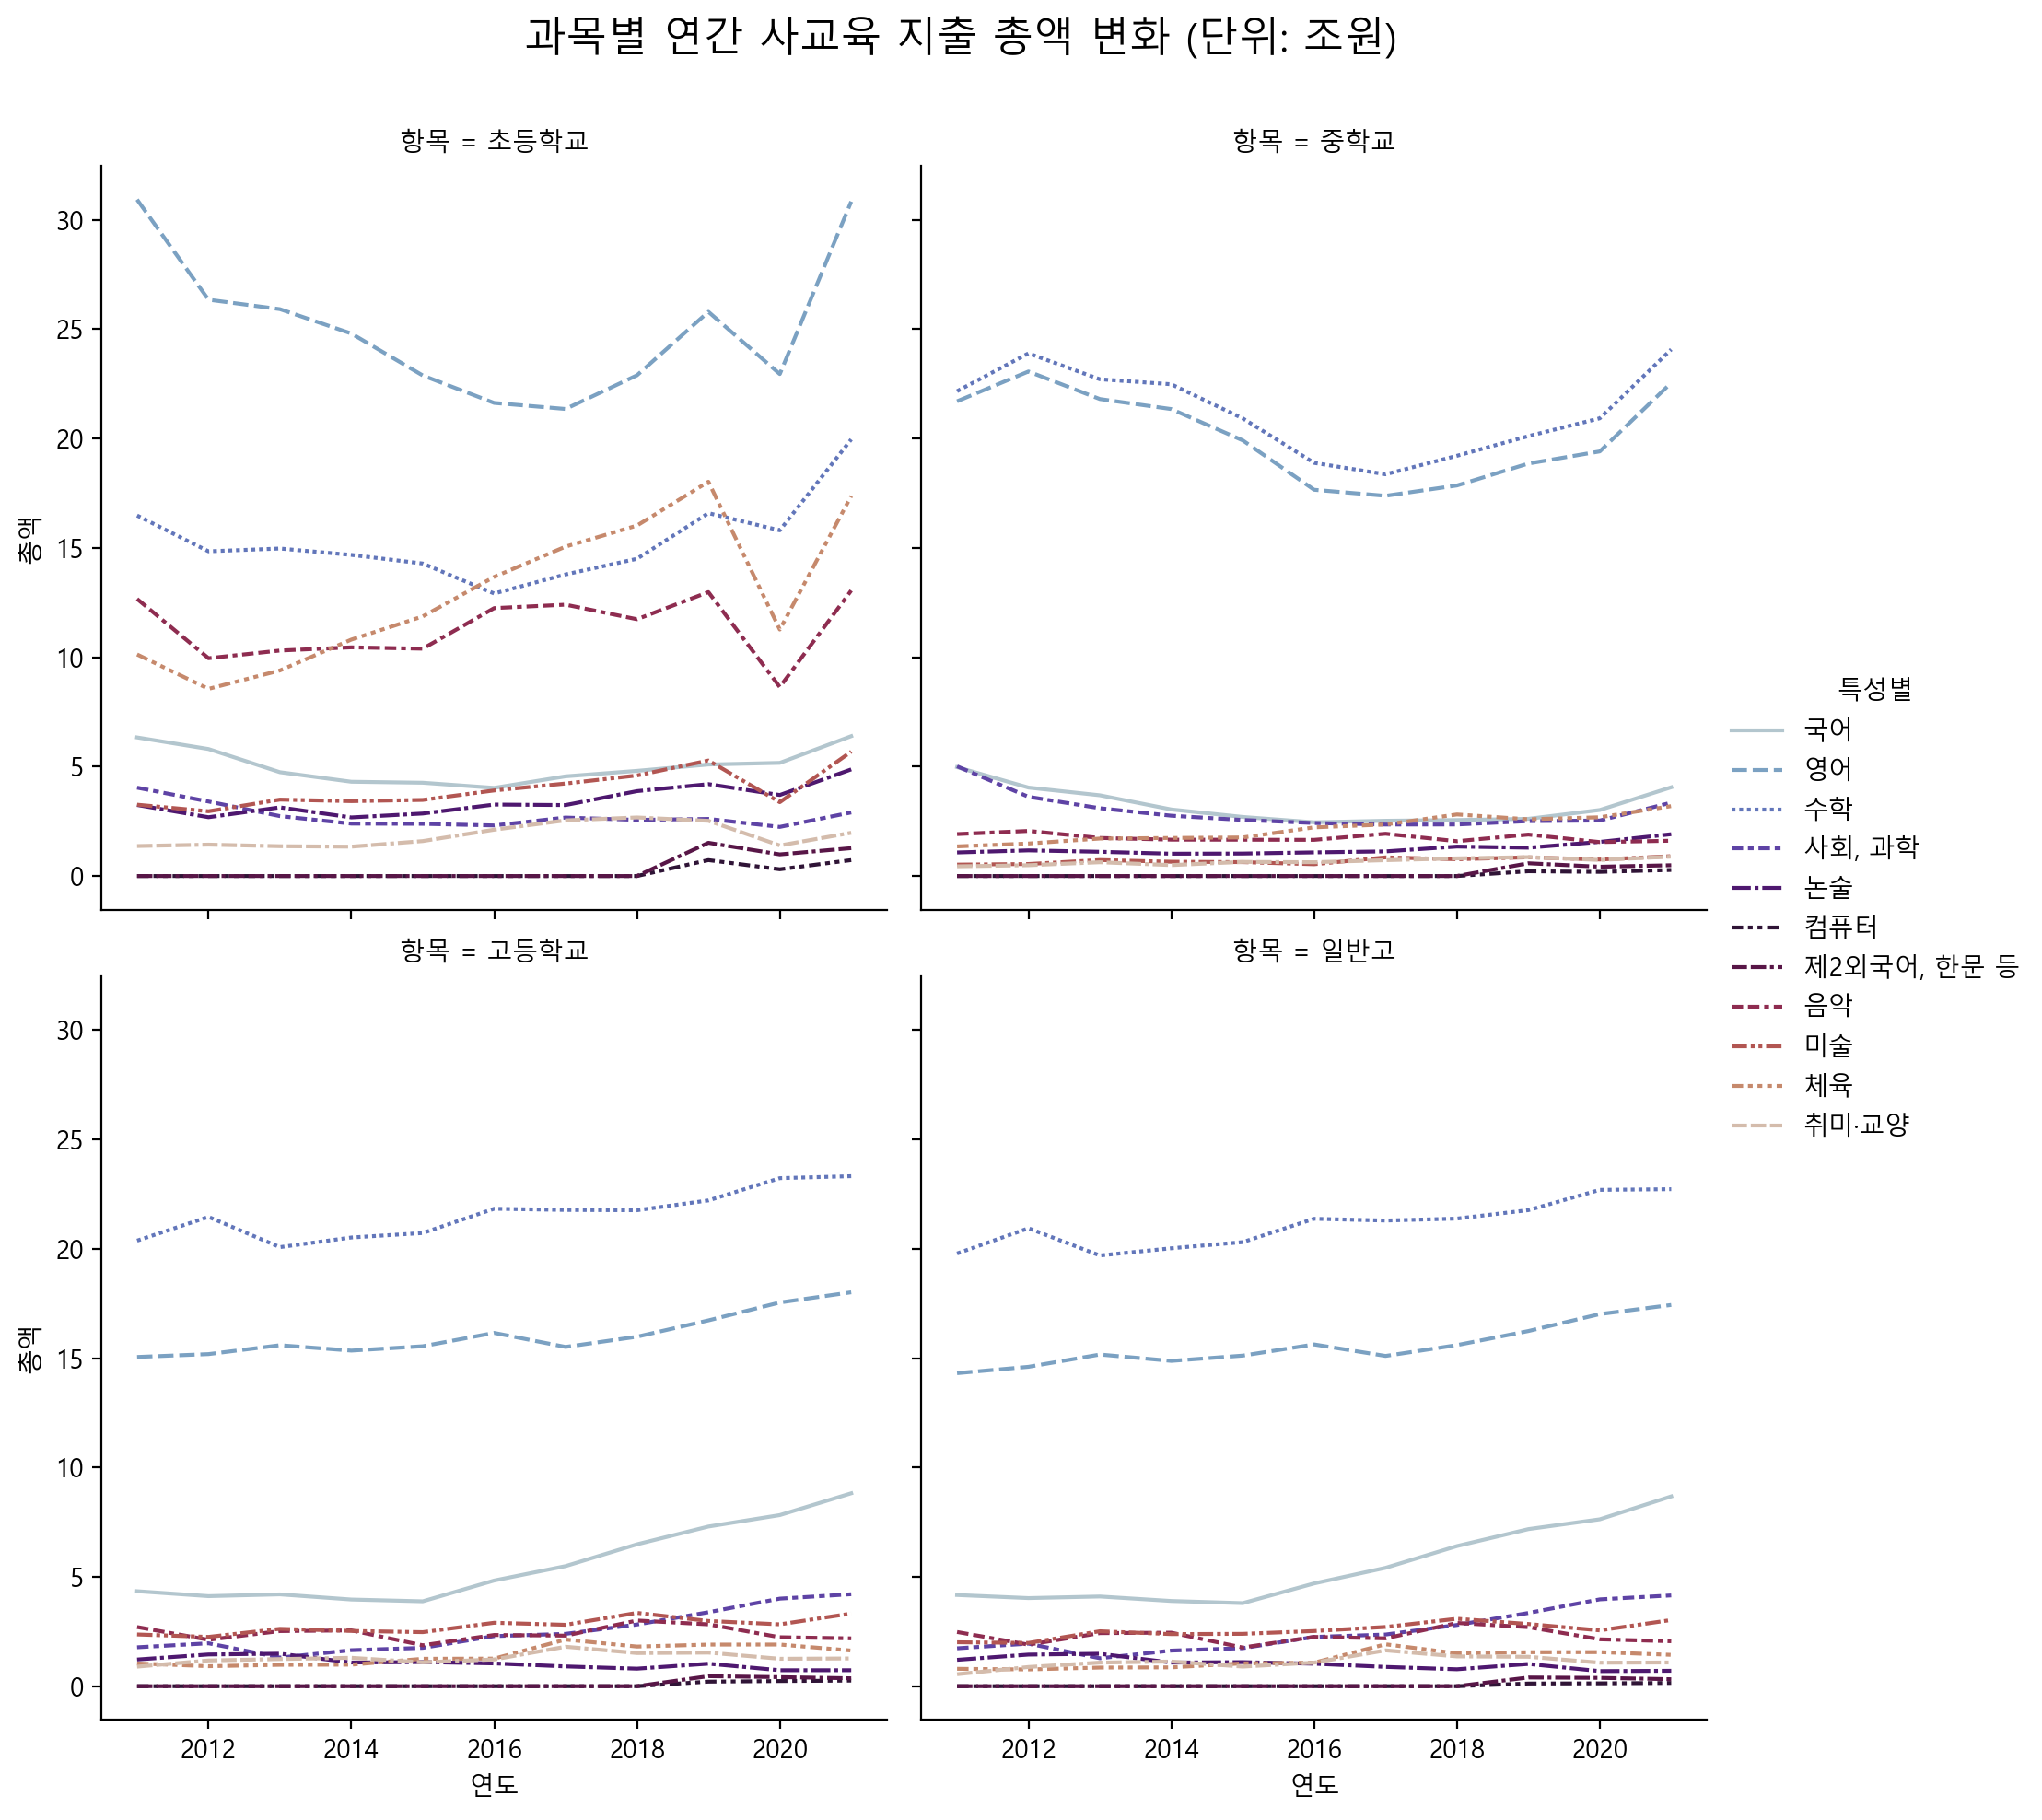

In [27]:
reg = sns.relplot(data =df_subject_sum ,x='연도',y=df_subject_sum['총액']/1000 ,hue='특성별',style='특성별'
                  ,col='항목',col_wrap=2 ,kind='line', palette="twilight")

reg.fig.subplots_adjust(top=0.9,left=0.1)
reg.fig.suptitle('과목별 연간 사교육 지출 총액 변화 (단위: 조원)', fontsize = 16)


plt.show()

- 고등학교 : 고등학교(일반고&특성화고)와 일반고(특성화고 제외)
- 서울시의 초·중·고등학생 대상 사교육은 크게 영어와 수학 중심으로 이루어졌음을 알 수 있다. 
    - 초등학교의 영어과목 사교육비 지출이 크게 늘었고 가장 비중이 높다. 
        - 어릴 때부터 학습 환경에 따른 학력격차가 여실히 드러나는 과목
        - 투자한 금액과 성적이 비례할 가능성이 높은 과목으로 학부모들 사이에서 관심 비중이 큰 과목이라고 한다.

## 가설 1- 2: 서울시 고등학교 사교육비 지출이 가장 높을 것이다. 
- 서울시 인당 월평균 사교육비 추세 

#### 데이터 수집 
- df_region_class_mean : 학교급별 전체 사교육비 지출 월 평균 금액


In [28]:
# 서울시 학교급별 월 평균 사교육비 
df_region_class_mean= pd.read_csv('dataset/학교급_및_시도별__학생_1인당_월평균_사교육비_20221019151957.csv',encoding = 'cp949')
df_region_class_mean['시도별'] = df_region_class_mean['시도별'].map(lambda x : x.replace(' ',''))
df_region_class_mean['항목'] = df_region_class_mean['항목'].map(lambda x : x.replace(' ','').replace('(만원)',''))
df_region_class_mean = pd.melt(df_region_class_mean, id_vars=['항목','시도별'], var_name = '시점', value_name = '월평균').set_axis(['교급','기준','연도','월평균'],axis='columns')

In [29]:
df_seoul_class_mean = df_region_class_mean[df_region_class_mean['기준'] !='전체']

In [30]:
df_region_class_mean.to_csv('dataset_eda/전국_서울_연간_인당_월평균_사교육비_지출.csv')
df_seoul_class_mean.to_csv('dataset_eda/서울시_연간_학교급별_인당_월평균_사교육비_지출.csv')

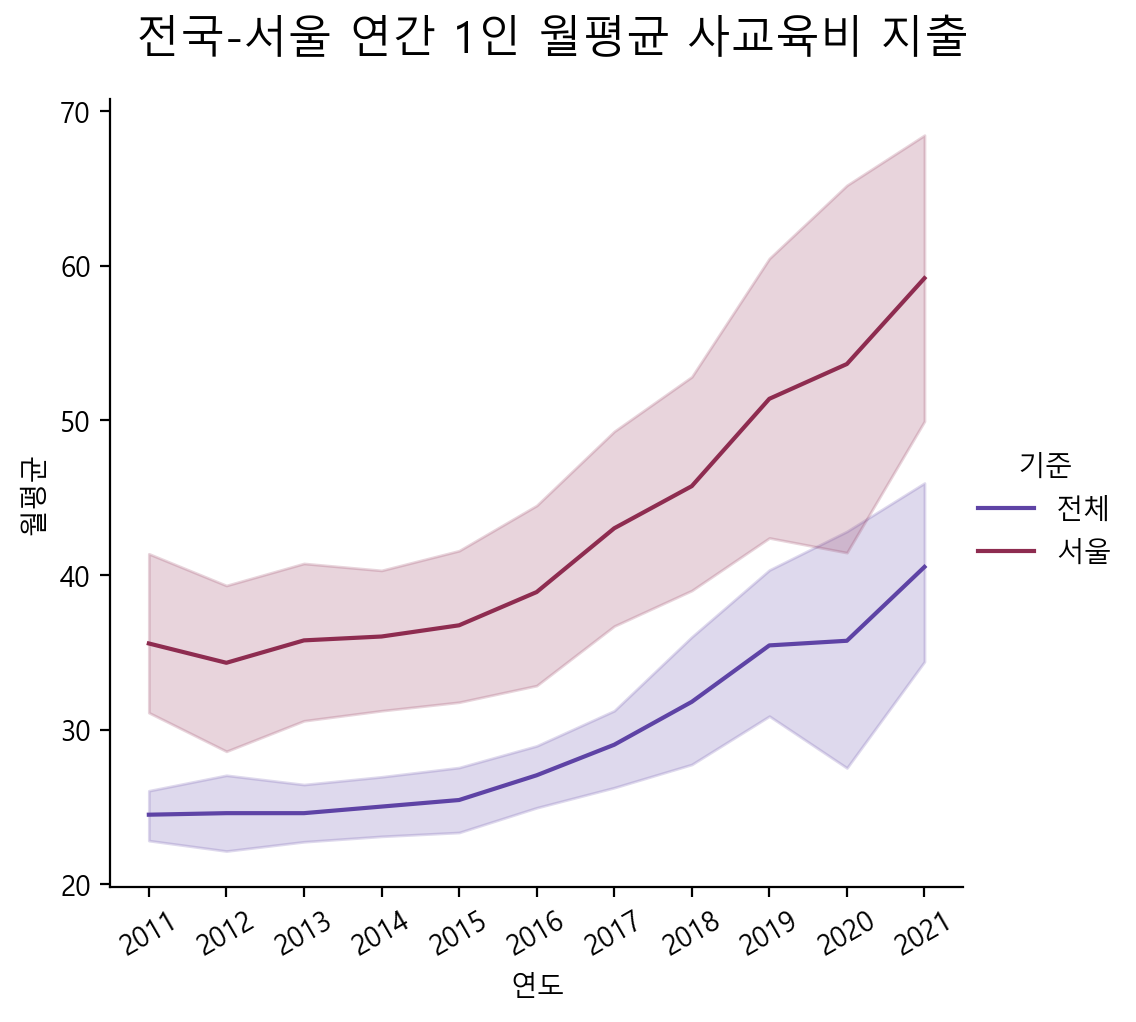

In [31]:
reg = sns.relplot(data=df_region_class_mean  ,x='연도',y='월평균',hue='기준',kind='line', palette="twilight")
reg.fig.subplots_adjust(top=0.9)
reg.fig.suptitle('전국-서울 연간 1인 월평균 사교육비 지출', fontsize = 16)
plt.xticks(rotation=30)
plt.show()

### 서울시 학교급별 인당 월 평균 사교육비 

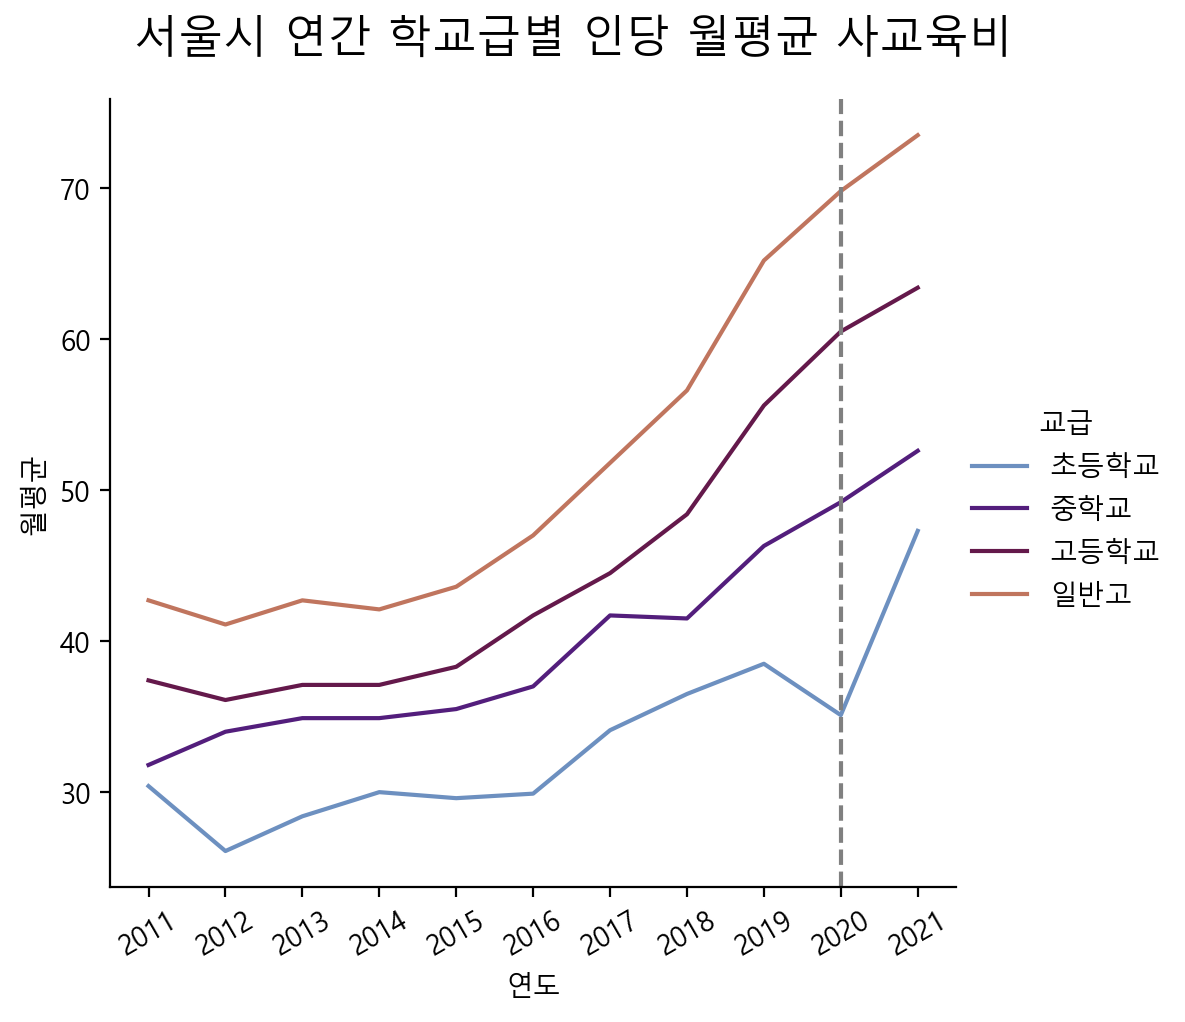

In [32]:
reg = sns.relplot(data=df_seoul_class_mean  ,x='연도',y='월평균',hue='교급',
                      kind='line', palette="twilight")

reg.fig.subplots_adjust(top=0.9)
reg.fig.suptitle('서울시 연간 학교급별 인당 월평균 사교육비', fontsize = 16)
plt.xticks(rotation=30)
plt.axvline(x='2020',linestyle='--',color='gray')
plt.show()

## 가설 1-3 : 서울시 각 학교급별 사교육 참여율이 가장 높을 것이다. 
- 전국- 서울시의 학교급별 사교육 참여율을 비교     
    - add table : 전국-서울 학교급별 사교육 참여율.csv 
- 고등학교의 참여율이 가장 높을것
 

#### 데이터 수집 
- df_region_class : 지역 - 학교급에 따른 연간 사교육 참여율 
      
- 칼럼명   
     기준 / 지역 / 연도 / 사교육 참여율 

In [33]:
df_region_class= pd.read_csv('dataset/학교급_및_시도별_사교육_참여율_20221019144245.csv',encoding = 'cp949')
df_region_class['시도별'] = df_region_class['시도별'].map(lambda x : x.replace(' ',''))
df_region_class['항목'] = df_region_class['항목'].map(lambda x : x.replace(' ','').replace('(%)',''))
df_region_class = pd.melt(df_region_class, id_vars=['항목','시도별'], var_name = '시점', value_name = '참여율').set_axis(['교급','기준','연도','참여율'],axis='columns')
df_region_class

,교급,기준,연도,참여율
0,초등학교,전체,2011,84.6
1,초등학교,서울,2011,87.7
2,중학교,전체,2011,71.0
3,중학교,서울,2011,73.4
4,고등학교,전체,2011,51.6
...,...,...,...,...
83,중학교,서울,2021,78.4
84,고등학교,전체,2021,64.6
85,고등학교,서울,2021,73.4
86,일반고,전체,2021,71.3


In [34]:
df_region_class.to_csv('dataset_eda/지역_학교급에_따른_연간_사교육_참여율.csv')

#### 분석과제 1. 전국-서울 교급별 참여율 비교 

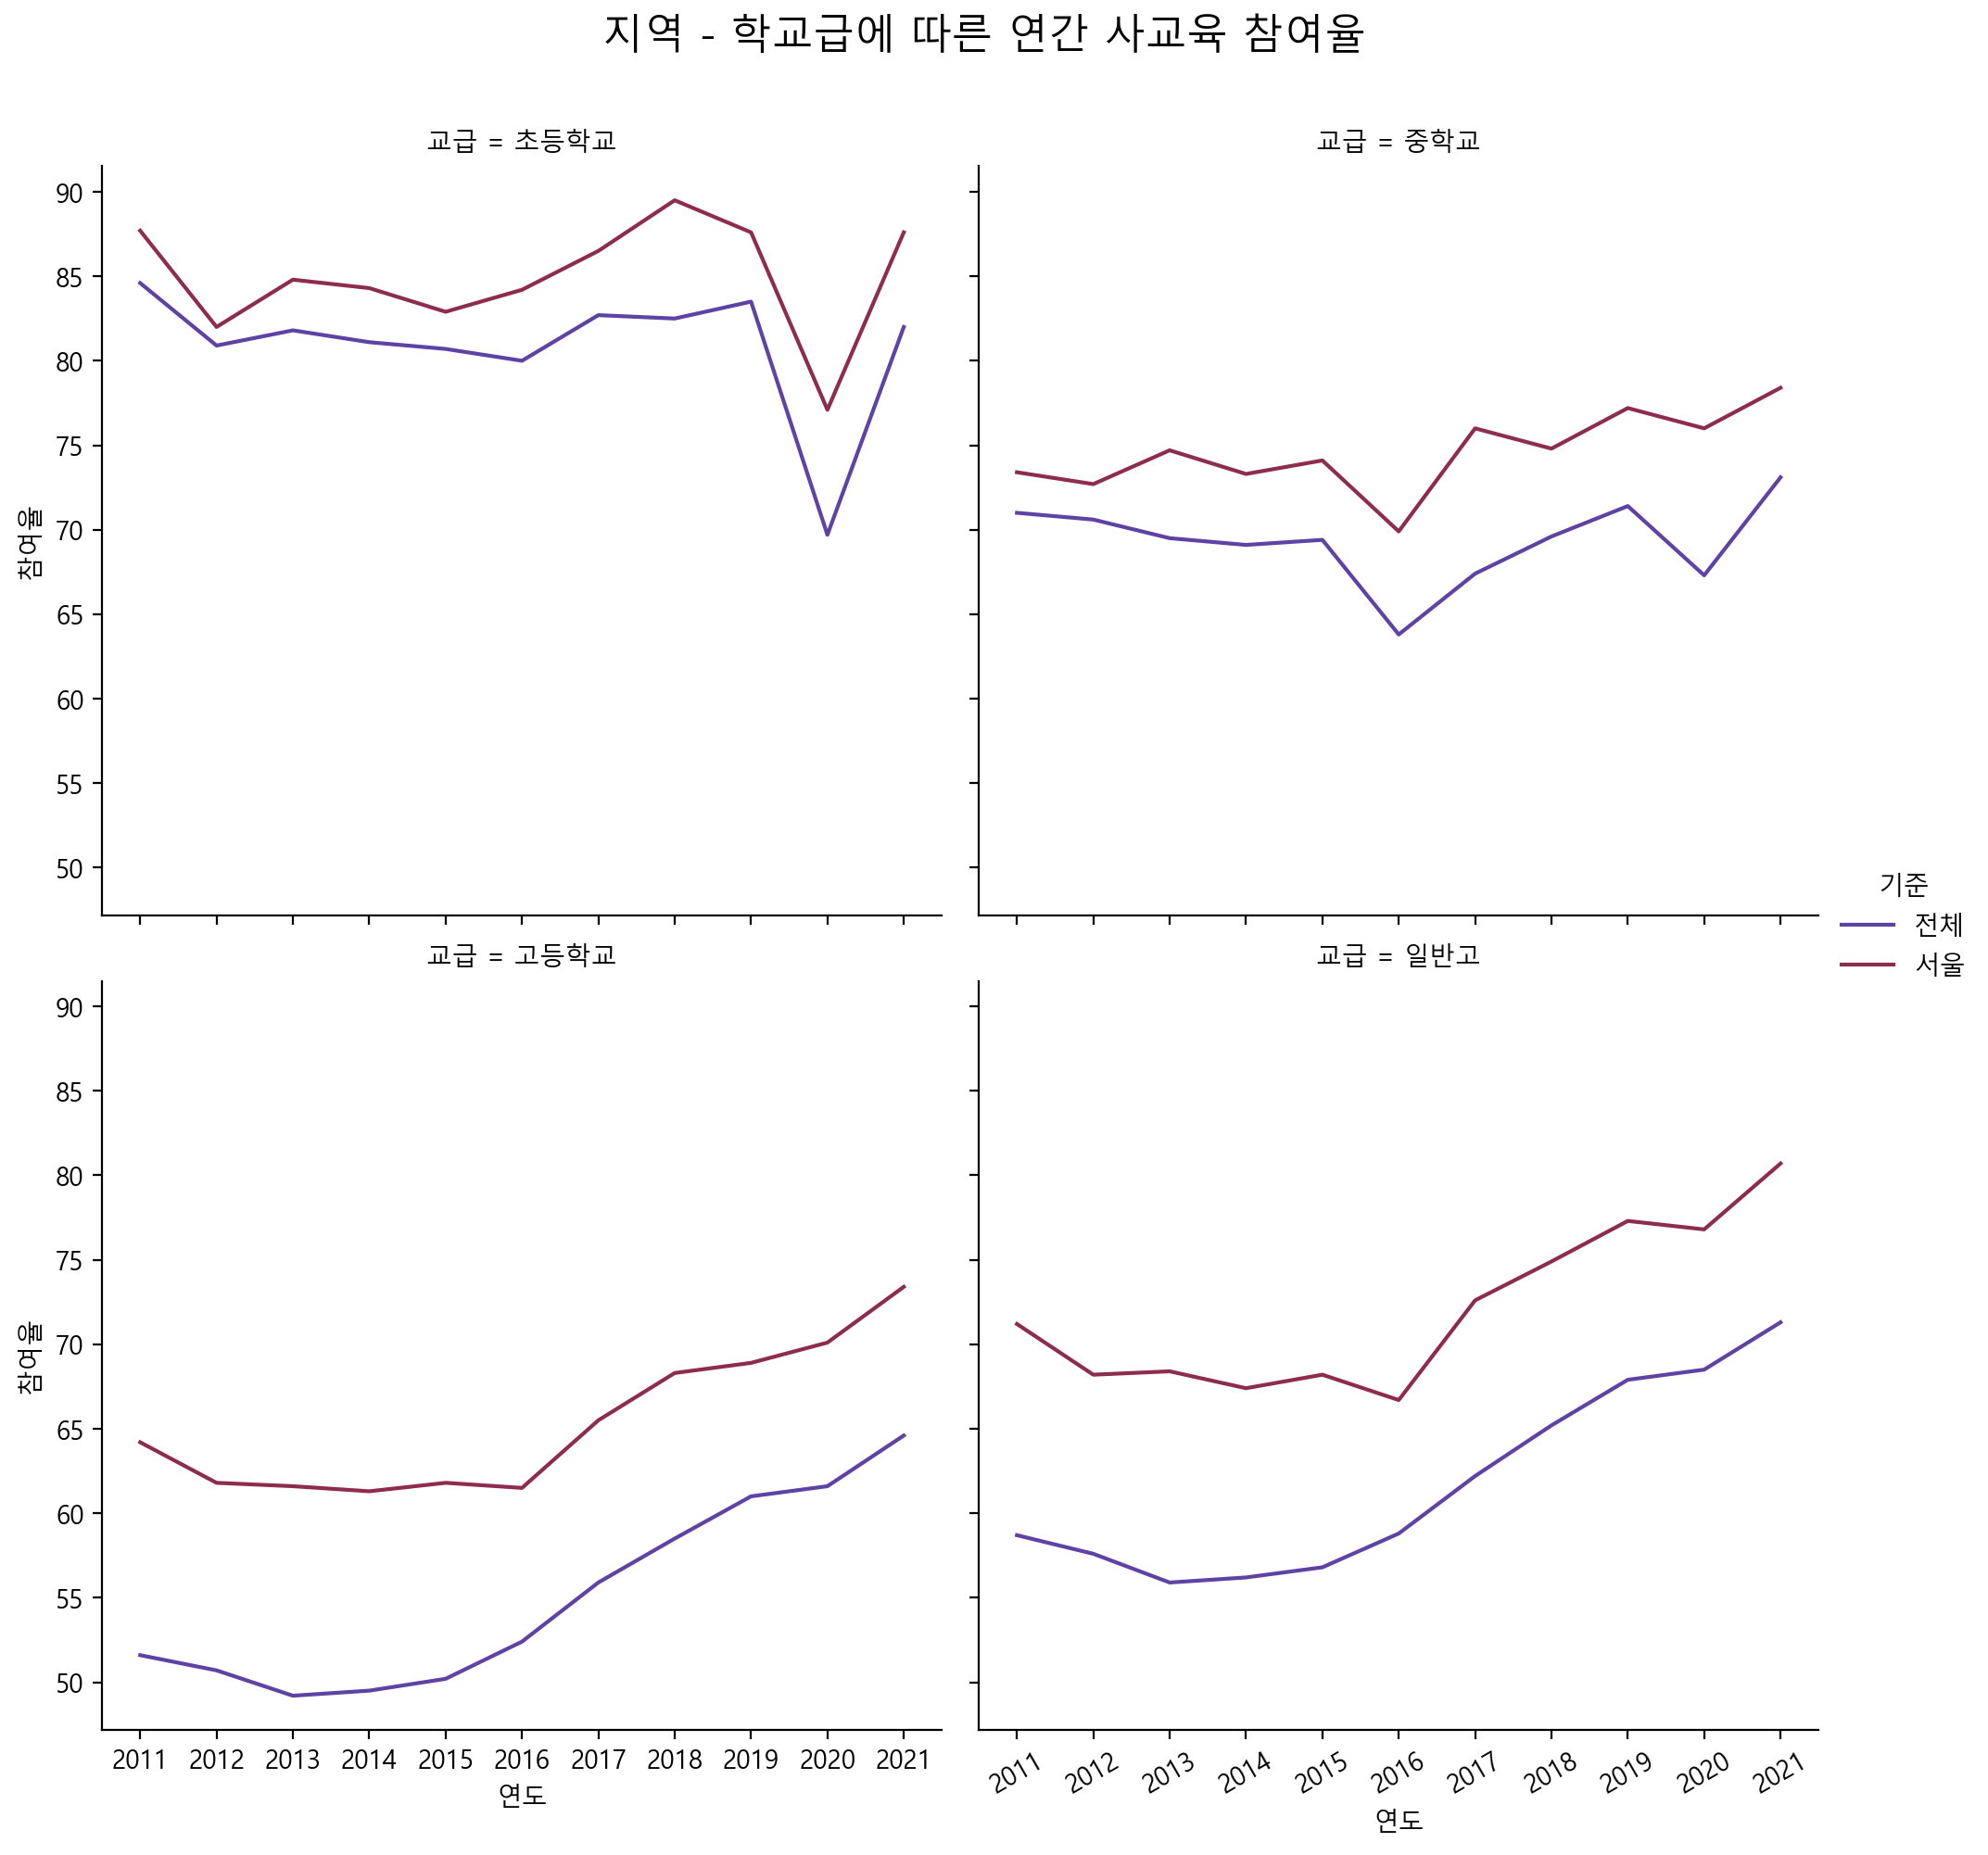

In [35]:
reg = sns.relplot(data=df_region_class,x='연도',y='참여율',hue='기준',col='교급',col_wrap=2,kind='line', palette="twilight")
reg.fig.subplots_adjust(top=0.9)
reg.fig.suptitle('지역 - 학교급에 따른 연간 사교육 참여율', fontsize = 16)
plt.xticks(rotation=30)
plt.show()

- 초등학교는 거의 80~90%가 사교육을 병행하는 것으로 판단됨 
    - 2020년 초반에는 비대면교육으로 잠시 주춤했다가 다시 증가세를 보이고 있다. 
- 서울의 평균 참여율은 전국 평균 참여율에 비해 높은편이다. 
- 사교육이 꾸준히 증가하고 있다는 점이 눈에 띈다. 

## 추가 EDA

### 사설 학원 현황

### 대입을 준비하는 이유 

In [36]:
import pandas as pd 
from glob import glob 

file_names = glob('dataset/*')
file_names

['dataset\\2011~2020 학업성취도 평가 고등학생.xlsx',
 'dataset\\2011~2020 학업성취도 평가 중학생.xlsx',
 'dataset\\2012-2022 교원의 주당 창의적체험활동시수 -service.csv',
 'dataset\\2012.csv',
 'dataset\\2013.csv',
 'dataset\\2014.csv',
 'dataset\\2015.csv',
 'dataset\\2016.csv',
 'dataset\\2017_2018.csv',
 'dataset\\2021_학업중단률 및 중단 사유.xlsx',
 'dataset\\international_test.xls',
 'dataset\\kr_test.xls',
 'dataset\\seoul_private.csv',
 'dataset\\seoul_stop_school.xlsx',
 'dataset\\고2 지역별 성취.xls',
 'dataset\\고등학생의_졸업_후_진로계획_고등학교_유형별_비교__20221021114009.csv',
 'dataset\\동아리_가입_및_활동_여부_2012.csv',
 'dataset\\동아리_가입_및_활동_여부_2013.csv',
 'dataset\\동아리_가입_및_활동_여부_2014.csv',
 'dataset\\동아리_가입_및_활동_여부_2015.csv',
 'dataset\\동아리_가입_및_활동_여부_2016.csv',
 'dataset\\동아리_가입_및_활동_여부_2017_2018.csv',
 'dataset\\소비자물가지수_20110545.csv',
 'dataset\\연도별 학생수.xlsx',
 'dataset\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv',
 'dataset\\일반교과_및_논술_관련_사교육_수강목적별_특성_분포_복수응답__20221020163045.csv',
 'dataset\\중3 지역별 성취.xls',
 'dataset\\중학생의_졸

#### 분석 과제 1.  중학생 고등학생의 진로 계획 과 진로 설정에 가장 큰 요인을 미치는 것 .



In [37]:
df_middle = pd.read_csv('dataset/중학생의_졸업_후_진로_계획_및_진학_희망_고등학교_선택에_가장_큰_영향요인_20221021092425.csv',encoding='cp949',header=0)
df_highschool =  pd.read_csv('dataset/고등학생의_졸업_후_진로계획_고등학교_유형별_비교__20221021114009.csv',encoding='cp949')

In [38]:
df_middle 

,고등학교선택기준,2015,2016,2017,2018,2019,2020
0,희망하는 진로·직업 목표,-,2144,2167,2487,2200,1895
1,좋아하는 것(흥미)과 잘하는 것(적성),3195,1197,1176,1281,1037,778
2,성적,2703,1865,1594,1251,1363,1330
3,부모님의 희망,953,834,652,751,279,740
4,선생님의 조언,1277,226,252,230,86,158
5,친구,-,334,353,354,321,325
6,경제적 이유,-,105,82,119,875,65
7,통학 거리,290,945,914,866,642,1076
8,기타,324,147,249,134,176,106
9,없음,155,1173,1216,886,1074,1166


In [39]:
df_middle = pd.melt(df_middle, id_vars=['고등학교선택기준'], var_name ='Year', value_name='count')
df_middle['Year'] = df_middle['Year'].astype(int)
df_middle['count'] = df_middle['count'].apply(mapping).astype(float) 
df_middle.head()

,고등학교선택기준,Year,count
0,희망하는 진로·직업 목표,2015,0.0
1,좋아하는 것(흥미)과 잘하는 것(적성),2015,3195.0
2,성적,2015,2703.0
3,부모님의 희망,2015,953.0
4,선생님의 조언,2015,1277.0


In [40]:
df_middle['고등학교선택기준'].unique()

array(['희망하는 진로·직업 목표', '좋아하는 것(흥미)과 잘하는 것(적성)', '성적', '부모님의 희망',
       '선생님의 조언', '친구', '경제적 이유', '통학 거리', '기타', '없음'], dtype=object)

고등학생의_졸업_후_진로계획

In [41]:
df_highschool  = pd.melt(df_highschool , id_vars=['진로계획'], var_name ='Year', value_name='count')
df_highschool ['Year'] = df_highschool ['Year'].astype(int)
df_highschool ['count'] = df_highschool ['count'].apply(mapping).astype(float) 

In [42]:
df_highschool['진로계획'].unique()

array(['대학 진학', '취업', '창업', '기타(군입대 해외 유학)', '진로미결정'], dtype=object)

In [43]:
from IPython.display import IFrame
import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.io as pio

from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar, Bar3D, Grid, Line, Liquid, Page, Pie, Timeline, Tab, Map, Grid
from pyecharts import options as opts

import folium, webbrowser, IPython, warnings
warnings.filterwarnings('ignore')

fig_middle_tab = Tab()

# 파이차트
reason =['희망하는 진로·직업 목표', '좋아하는 것(흥미)과 잘하는 것(적성)', '성적', '부모님의 희망',
       '선생님의 조언', '친구', '경제적 이유', '통학 거리', '기타', '없음']

after_plan  = ['대학 진학', '취업', '창업', '기타(군입대 해외 유학)', '진로미결정']

fig_reason_mid= Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 
fig_reason_high= Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 

# 2016 ~ 2020
for t in df_middle['Year'].unique()[1:]:
    fig_reason_mid.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(reason, df_middle[df_middle['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))
        
         .set_global_opts(title_opts=opts.TitleOpts("전국 중학생 진학 선택 기준", subtitle = "마우스를 올려 확인해보세요!"),
                          legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                      pos_bottom ="70%",pos_left="75%",
                                                      orient="vertical",legend_icon ='pin'))),"{}년도".format(t))
for t in df_middle['Year'].unique()[1:]: 
    fig_reason_high.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(after_plan , df_highschool[df_highschool['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))

            .set_global_opts(title_opts=opts.TitleOpts("전국 고등학생 졸업 후 진로계획", subtitle = "마우스를 올려 확인해보세요!"),
                            legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                        pos_bottom ="70%",pos_left="75%",
                                                        orient="vertical",legend_icon ='pin'))),"{}년도".format(t))


    
        
fig_middle_tab.add(fig_reason_mid,'중학생의 졸업 후 고교 선정 기준 ')
fig_middle_tab.add(fig_reason_high,'고등학생의 졸업 후 향후 진로 계획')
fig_middle_tab.render('df_korea_student.html')

'C:\\Users\\sanga\\Desktop\\Structure-main\\Structure\\df_korea_student.html'

In [44]:
df_desiredlevel = pd.read_csv('dataset/희망_교육수준_20221021093035.csv',encoding='cp949')
df_desiredlevel= pd.melt(df_desiredlevel, id_vars=['희망최종학력','조사대상'], var_name ='Year', value_name='count')
df_desiredlevel['Year'] = df_desiredlevel['Year'].astype(int)
df_desiredlevel['count'] = df_desiredlevel['count'].apply(mapping).astype(float) 
df_desiredlevel.head()

,희망최종학력,조사대상,Year,count
0,고등학교,초등학생,2015,5.9
1,고등학교,중학생,2015,12.0
2,고등학교,고등학생,2015,9.3
3,전문대학(2·3·4년제),초등학생,2015,18.3
4,전문대학(2·3·4년제),중학생,2015,10.4


In [46]:
df_dream = pd.read_csv('dataset/희망_직업이_있는_학생_비율_20221021093225.csv', encoding='cp949')
df_dream= pd.melt(df_dream, id_vars=['조사대상','희망직업유무'], var_name ='Year', value_name='count')
df_dream['Year'] = df_dream['Year'].astype(int)
df_dream['count'] = df_dream['count'].apply(mapping).astype(float) 
df_dream

,조사대상,희망직업유무,Year,count
0,초등학생,예,2015,91.3
1,초등학생,아니오,2015,8.7
2,중학생,예,2015,73.0
3,중학생,아니오,2015,27.0
4,고등학생,예,2015,81.7
5,고등학생,아니오,2015,18.3
6,초등학생,예,2016,88.8
7,초등학생,아니오,2016,11.2
8,중학생,예,2016,73.4
9,중학생,아니오,2016,26.6


In [47]:
df_middle.to_csv('dataset_eda/중학생 -졸업후_진학고교_선정기준.csv')
df_highschool.to_csv('dataset_eda/고등학생_졸업후_진로계획.csv')
df_desiredlevel.to_csv('dataset_eda/학교급별_희망하는_최종학력.csv')
df_dream.to_csv('dataset_eda/학교급별_희망직무여부.csv')

In [48]:
df_desiredlevel = pd.pivot_table(df_desiredlevel,index=['Year','희망최종학력'],columns='조사대상')

In [49]:
df_desiredlevel

count            
조사대상                고등학생   중학생  초등학생
Year 희망최종학력                         
2015 고등학교            9.3  12.0   5.9
     기타(잘 모름 등)     10.6  12.8  13.5
     대학교(4·5·6년제)   54.5  50.3  44.2
     대학원(석사·박사)     13.6  10.7  16.9
     전문대학(2·3·4년제)  12.1  10.4  18.3
2016 고등학교            7.4  11.0   4.9
     기타(잘 모름 등)      9.7   9.6  10.7
     대학교(4·5·6년제)   55.5  54.4  50.6
     대학원(석사·박사)     14.2  12.1  14.7
     전문대학(2·3·4년제)  13.2  10.3  18.0
2017 고등학교            7.5  12.1  10.6
     기타(잘 모름 등)      8.5  11.7  18.5
     대학교(4·5·6년제)   56.5  53.4  38.3
     대학원(석사·박사)     14.3  10.8  12.4
     전문대학(2·3·4년제)  13.2   8.9  15.2
2018 고등학교           10.4  15.8  13.8
     기타(잘 모름 등)      9.1  13.0  20.2
     대학교(4·5·6년제)   53.9  47.7  36.5
     대학원(석사·박사)     12.9   8.3   8.9
     전문대학(2·3·4년제)  13.7  11.5  15.6
2019 고등학교           10.4  15.0  13.6
     기타(잘 모름 등)      8.1  13.6  21.4
     대학교(4·5·6년제)   54.0  49.9  36.7
     대학원(석사·박사)     15.1   8.6   9.0
     전문대학(2·3·4년제)  12.4   8.9  12.4
2020 고등학교            8.4  12.1  10.5
     기타(잘 모름 등)      8.0  14.0  22.3
     대학교(4·5·6년제)   53.7  47.9  29.5
     대학원(석사·박사)     14.2   9.8  12.3
     전문대학(2·3·4년제)  15.8  14.0  20.5
2021 고등학교            9.5  13.3  12.1
     기타(잘 모름 등)      7.9  12.8  21.3
     대학교(4·5·6년제)   55.7  47.1  33.2
     대학원(석사·박사)     13.0   8.5   9.9
     전문대학(2·3·4년제)  13.9  15.3  16.3

In [50]:
df_dream = pd.pivot_table(df_dream, index=['Year','희망직업유무'],columns='조사대상')

In [51]:
df_dream 

count            
조사대상         고등학생   중학생  초등학생
Year 희망직업유무                  
2015 아니오     18.3  27.0   8.7
     예       81.7  73.0  91.3
2016 아니오     18.6  26.6  11.2
     예       81.4  73.4  88.8
2017 아니오     20.6  30.1  11.5
     예       79.4  69.9  88.5
2018 아니오     19.4  28.0  10.7
     예       80.6  72.0  89.3
2019 아니오     20.5  28.1  12.8
     예       79.5  71.9  87.2
2020 아니오     23.3  33.3  20.1
     예       76.7  66.7  79.9
2021 아니오     23.7  36.8  20.9
     예       76.3  63.2  79.1

In [52]:
tab = Tab()

final_edu = ['고등학교', '전문대학(2·3·4년제)', '대학교(4·5·6년제)', 
             '대학원(석사·박사)','기타(잘 모름 등)']
yesorno = ['예', '아니오']


#희망_교육수준 
final_edu_charts =Timeline(
    init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS, 
        height='600px',
        width='800px')
).add_schema(is_auto_play=True)

for t in df_desiredlevel.index.get_level_values(0).unique().tolist():
    df= df_desiredlevel.loc[t]
    df =df.transpose()

    final_edu_charts.add((Bar(
        init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
  ).add_xaxis(df.index.tolist())
  .add_yaxis('고등학교',df['고등학교'].to_list(),stack="stack1")
  .add_yaxis('전문대학(2·3·4년제)',df['전문대학(2·3·4년제)'].to_list(),stack="stack1")
  .add_yaxis('대학교(4·5·6년제)',df['대학교(4·5·6년제)'].to_list(),stack="stack1")
  .add_yaxis('대학원(석사·박사)',df['대학원(석사·박사)'].to_list(),stack="stack1")
  .add_yaxis('기타(잘 모름 등)',df['기타(잘 모름 등)'].to_list(),stack="stack1")
  .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='inside'))
  .set_global_opts(title_opts=opts.TitleOpts(title="학교급별 희망하는 최종 학력", subtitle="마우스를 올려 확인해보세요!"),
                     tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                     legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                 pos_left="40%", pos_bottom='90%', orient='verticle',legend_icon ='pin')))
  ,"{}년도".format(t))
    

# 중*고등학생 희망 직업의 유무 
dream_job_status =Timeline(
    init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS, 
        height='600px',
        width='800px')
).add_schema(is_auto_play=True)

for t in df_dream.index.get_level_values(0).unique().tolist():
    df= df_dream.loc[t]
    df =df.transpose()

    dream_job_status.add((Bar(
        init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
  ).add_xaxis(df.index.tolist())
  .add_yaxis('예',df['예'].to_list(),stack="stack1")
  .add_yaxis('아니오',df['아니오'].to_list(),stack="stack1")
  .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='inside'))
  .set_global_opts(title_opts=opts.TitleOpts(title="학교급별 희망하는 직업의 유무 ", subtitle="마우스를 올려 확인해보세요!"),
                     tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                     legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                 pos_left="40%", pos_bottom='90%', orient='verticle',legend_icon ='pin')))
  ,"{}년도".format(t))
    
    

tab.add(final_edu_charts ,'희망 최종 학력')    
tab.add(dream_job_status,'희망 직업의 유무')
tab.render('df_survey_by_school_level.html')

'C:\\Users\\sanga\\Desktop\\Structure-main\\Structure\\df_survey_by_school_level.html'

In [55]:
df_regsub = pd.read_csv('dataset/지역별_학생_1인당_월평균_사교육비_pye.csv',encoding='cp949')
df_regsub.head()

,항목,과목 및 유형,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,서 울 (만원),국 어,2.7,2.4,2.3,2.3,2.3,2.5,3.0,3.2,3.5,4.1,4.8
1,서 울 (만원),영 어,10.8,10.1,11.3,11.2,11.2,10.7,11.1,12.0,13.0,13.7,15.7
2,서 울 (만원),수 학,9.6,10.4,10.4,10.8,10.6,10.8,11.7,11.9,12.6,14.1,15.5
3,서 울 (만원),"사회, 과학",1.7,1.7,1.1,1.2,1.3,1.6,1.8,1.8,2.1,2.5,2.7
4,서 울 (만원),논 술,1.0,1.1,1.3,1.0,1.1,1.2,1.3,1.3,1.5,1.6,1.9


In [56]:
df_regsub['항목'] = df_regsub['항목'].map(lambda x : x.replace('(만원)','').replace(' ',''))
df_regsub['과목 및 유형'] = df_regsub['과목 및 유형'].map(lambda x : x.replace(' ',''))
df_regsub= pd.melt(df_regsub, id_vars=['항목','과목 및 유형'], var_name ='Year', value_name='count')
df_regsub['Year'] = df_regsub['Year'].astype(int)
df_regsub['count'] = df_regsub['count'].apply(mapping).astype(float) 

In [57]:
df_regsub

,항목,과목 및 유형,Year,count
0,서울,국어,2011,2.7
1,서울,영어,2011,10.8
2,서울,수학,2011,9.6
3,서울,"사회,과학",2011,1.7
4,서울,논술,2011,1.0
...,...,...,...,...
347,읍면지역,"사회,과학",2021,1.1
348,읍면지역,논술,2021,0.7
349,읍면지역,음악,2021,2.0
350,읍면지역,미술,2021,1.0


In [58]:
df_regsub_pivot = pd.pivot_table(df_regsub,index=['Year','과목 및 유형'],columns='항목')

In [59]:
df_regsub['과목 및 유형'].unique()

array(['국어', '영어', '수학', '사회,과학', '논술', '음악', '미술', '체육'], dtype=object)

In [60]:
df_regsub_pivot

count                 
항목             광역시    서울 읍면지역  중소도시
Year 과목 및 유형                       
2011 국어        1.7   2.7  1.5   1.7
     논술        0.6   1.0  0.4   0.7
     미술        0.7   0.9  0.5   0.8
     사회,과학     1.2   1.7  1.2   1.2
     수학        7.0   9.6  4.0   7.1
...            ...   ...  ...   ...
2021 사회,과학     1.6   2.7  1.1   1.5
     수학       10.5  15.5  6.9  10.2
     영어       11.0  15.7  7.0  11.2
     음악        2.5   3.6  2.0   2.6
     체육        3.3   4.4  2.8   3.5

[88 rows x 4 columns]

참여율

In [61]:
df_regratio = pd.read_csv('dataset/지역별_사교육_참여율_pye.csv',encoding='cp949')
df_regratio['항목'] = df_regratio['항목'].map(lambda x : x.replace('(%)','').replace(' ',''))
df_regratio['과목 및 유형'] = df_regratio['과목 및 유형'].map(lambda x : x.replace(' ',''))
df_regratio= pd.melt(df_regratio, id_vars=['항목','과목 및 유형'], var_name ='Year', value_name='Percent')
df_regratio['Year'] = df_regratio['Year'].astype(int)
df_regratio['Percent'] = df_regratio['Percent'].apply(mapping).astype(float) 
df_regratio.head()

,항목,과목 및 유형,Year,Percent
0,서울,국어,2011,28.9
1,서울,영어,2011,54.7
2,서울,수학,2011,54.3
3,서울,"사회,과학",2011,17.0
4,서울,컴퓨터,2011,0.0


In [62]:
df_regratio_pivot = pd.pivot_table(df_regratio,index=['Year','과목 및 유형'],columns='항목')
df_regratio_pivot

Percent                  
항목                 광역시    서울  읍면지역  중소도시
Year 과목 및 유형                            
2011 국어           24.6  28.9  27.2  25.6
     미술            6.1   7.9   5.1   6.6
     사회,과학        16.6  17.0  19.1  16.4
     수학           50.6  54.3  43.2  50.9
     영어           47.9  54.7  41.7  50.4
...                ...   ...   ...   ...
2021 영어           50.0  57.6  40.1  50.2
     음악           17.1  20.8  14.8  17.2
     제2외국어,한문등     4.2   5.2   3.9   4.3
     체육           24.0  27.3  20.3  25.0
     컴퓨터           2.0   2.2   1.3   1.6

[99 rows x 4 columns]

In [63]:
df_regratio['과목 및 유형'].unique()

array(['국어', '영어', '수학', '사회,과학', '컴퓨터', '제2외국어,한문등', '음악', '미술', '체육'],
      dtype=object)

In [64]:
df_regratio['과목 및 유형'].unique()

array(['국어', '영어', '수학', '사회,과학', '컴퓨터', '제2외국어,한문등', '음악', '미술', '체육'],
      dtype=object)

In [65]:
df_regsub_seoul = df_regsub[df_regsub['항목']=='서울']
df_regsub_gwang= df_regsub[df_regsub['항목']=='광역시']
df_regsub_jung = df_regsub[df_regsub['항목']=='중소도시']
df_regsub_ueb = df_regsub[df_regsub['항목']=='읍면지역']

### 참여율 

In [66]:
fig_region_Subject = Tab()

# 파이차트

fig_regratio = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 

fig_regpie_seoul = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 
fig_regpie_gwang = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 
fig_regpie_jung = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 
fig_regpie_ueb = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 


subject = ['국어', '영어', '수학', '사회,과학', '컴퓨터', '제2외국어,한문등', '음악', '미술', '체육']

# 2016 ~ 2020

for t in df_regratio_pivot.index.get_level_values(0).unique().tolist():
    df= df_regratio_pivot.loc[t]
    df =df.transpose()

    fig_regratio.add((Bar(
        init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
  ).add_xaxis(df.index.tolist())
  .add_yaxis('국어',df['국어'].to_list(),stack="stack1")
  .add_yaxis('영어',df['영어'].to_list(),stack="stack1")
  .add_yaxis('수학',df['수학'].to_list(),stack="stack1")
  .add_yaxis('사회,과학',df['사회,과학'].to_list(),stack="stack1")
  .add_yaxis('컴퓨터',df['컴퓨터'].to_list(),stack="stack1")
  .add_yaxis('음악',df['음악'].to_list(),stack="stack1")
  .add_yaxis('미술',df['미술'].to_list(),stack="stack1")
  .add_yaxis('체육',df['체육'].to_list(),stack="stack1")
  .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='inside'))
  .set_global_opts(title_opts=opts.TitleOpts(title="각 지역 과목별 사교육 참여율 (%)", subtitle="마우스를 올려 확인해보세요!"),
                     tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                     legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                 pos_left="60%", pos_bottom='80%', orient='verticle',legend_icon ='pin')))
                                                          ,"{}년도".format(t))

for t in df_regsub_seoul['Year'].unique():
    fig_regpie_seoul.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(subject,df_regsub_seoul[df_regsub_seoul['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))
        
         .set_global_opts(title_opts=opts.TitleOpts("각 지역 과목별 월 평균 사교육비 (단위 : 만원)", subtitle = "마우스를 올려 확인해보세요!"),
                          legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                      pos_bottom ="70%",pos_left="75%",
                                                      orient="vertical",legend_icon ='pin'))),"{}년도".format(t))
for t in df_regsub_gwang['Year'].unique():
    fig_regpie_gwang.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(subject,df_regsub_gwang[df_regsub_gwang['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))
        
         .set_global_opts(title_opts=opts.TitleOpts("각 지역 과목별 월 평균 사교육비 (단위 : 만원)", subtitle = "마우스를 올려 확인해보세요!"),
                          legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                      pos_bottom ="70%",pos_left="75%",
                                                      orient="vertical",legend_icon ='pin'))),"{}년도".format(t))
for t in df_regsub_jung['Year'].unique():
    fig_regpie_jung.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(subject,df_regsub_jung[df_regsub_jung['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))
        
         .set_global_opts(title_opts=opts.TitleOpts("각 지역 과목별 월 평균 사교육비 (단위 : 만원)", subtitle = "마우스를 올려 확인해보세요!"),
                          legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                      pos_bottom ="70%",pos_left="75%",
                                                      orient="vertical",legend_icon ='pin'))),"{}년도".format(t))
for t in df_regsub_ueb['Year'].unique():
    fig_regpie_ueb.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(subject,df_regsub_ueb[df_regsub_ueb['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))
        
         .set_global_opts(title_opts=opts.TitleOpts("각 지역 과목별 월 평균 사교육비 (단위 : 만원)", subtitle = "마우스를 올려 확인해보세요!"),
                          legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                      pos_bottom ="70%",pos_left="75%",
                                                      orient="vertical",legend_icon ='pin'))),"{}년도".format(t))


fig_region_Subject.add(fig_regratio ,'각 지역 과목별 사교육 참여율')

fig_region_Subject.add(fig_regpie_seoul ,'서울')
fig_region_Subject.add(fig_regpie_gwang ,'광역시')
fig_region_Subject.add(fig_regpie_jung ,'중소도시')
fig_region_Subject.add(fig_regpie_ueb ,'읍면도시')    
fig_region_Subject.render('df_region_subject_chart.html')

'C:\\Users\\sanga\\Desktop\\Structure-main\\Structure\\df_region_subject_chart.html'